# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 statsmodels==0.14.1 -q --user

In [ ]:
import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
     f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/INNHotelsGroup.csv')


In [ ]:
data=hotel.copy()

## Data Overview

- Observations
- Sanity checks

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [ ]:
data.shape

(36275, 19)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* Booking ID is unique ID and it is object type
* Type of meal plan, room type reserved, market segment type, and booking status is object type. Other variables are float or integer type.

In [ ]:
data.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

* Average number of adult per booking is 2 and maximum adult per booking is 4.
* There's a huge difference in the 75th percentile and maximum value of Number of children indicating the presence of outliers. Also, 75% of the observations are 0.
* The average lead time is 85 days.
* Average price per room is 103 euros and maximum price is 540 euros

In [ ]:
data.duplicated().sum()

np.int64(0)

* There are no duplicate values in the dataset.

In [ ]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

* There are no missing values in the dataset

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [ ]:
# Defining function to create Histogram and boxplot combined on one page
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=60, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Univariate Analysis

#### Observations on no of adults

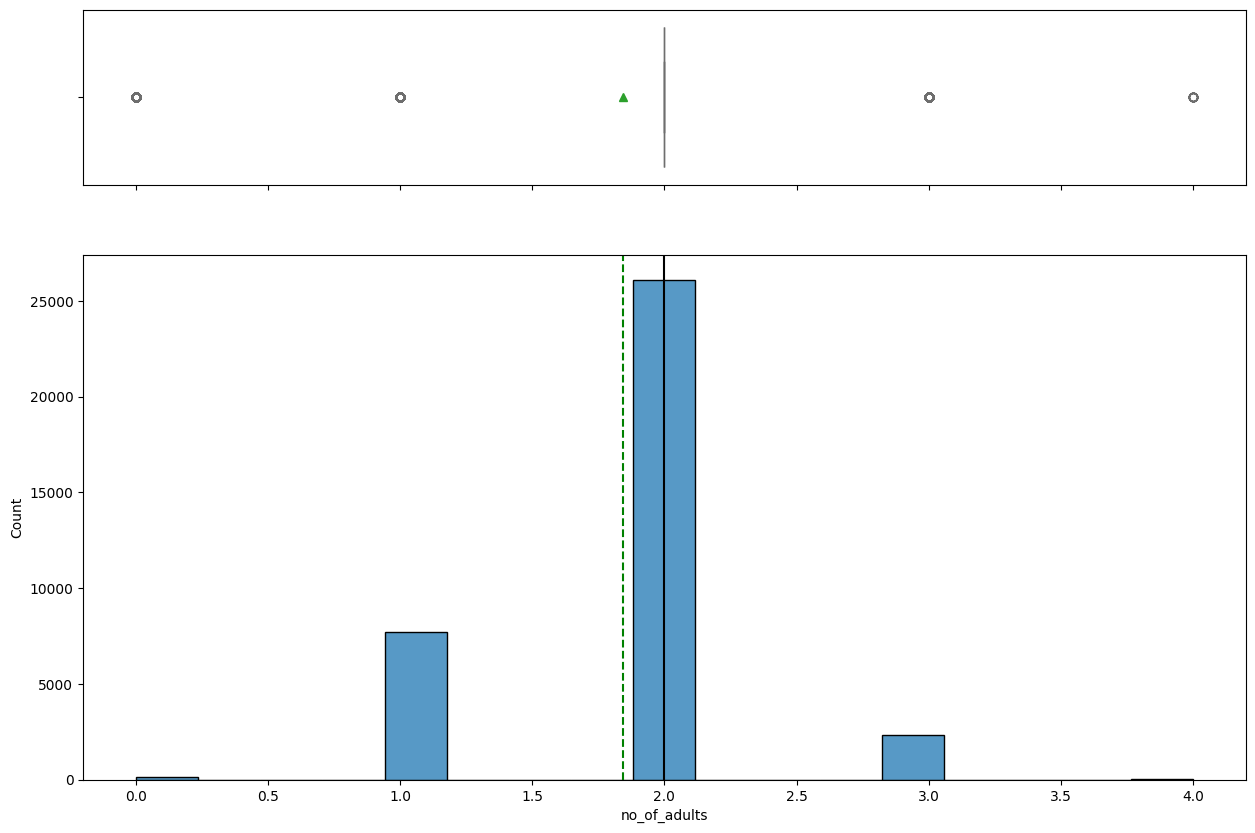

In [ ]:
histogram_boxplot(data,'no_of_adults', kde=False, bins=None)

In [ ]:
data['no_of_adults'].value_counts()

no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

* Median no of adults booked the hotel is 2.
* The Distribution is left skewed.
* There are 139 bookings has zero no. of adults, we will have to look into this.

### Observations on no_of_children

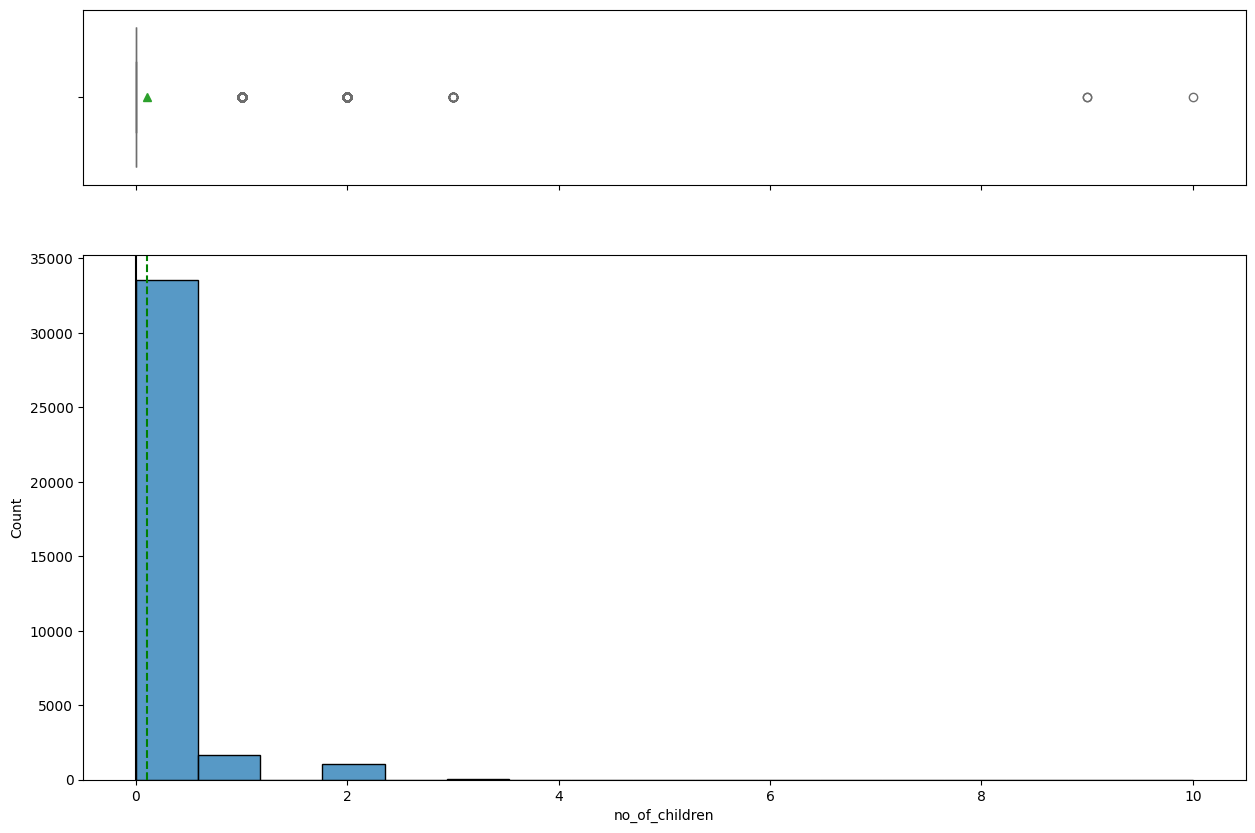

In [ ]:
histogram_boxplot(data,'no_of_children', kde=False, bins=None)

In [ ]:
data['no_of_children'].value_counts()

no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

* Most of the bookings has zero no on children.
* The data is right skewed.
* There is one booking has 10 no on children, we may have to look into it.

### Observations on no_of_weekend_nights

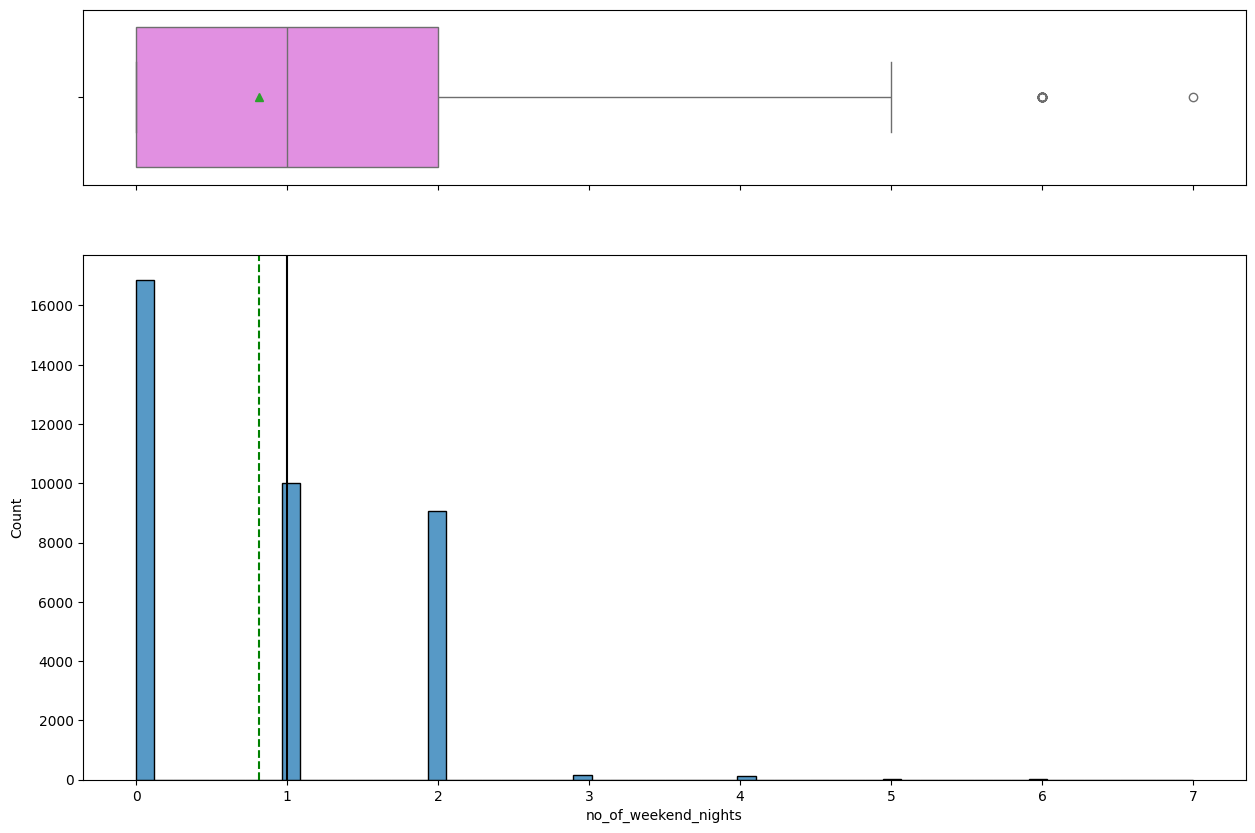

In [ ]:
histogram_boxplot(data,'no_of_weekend_nights',kde=False, bins=None)

In [ ]:
data['no_of_weekend_nights'].value_counts()

no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

* Most of the booking have zero number of weekend nights.
* There are some outliers in the right side of the data, having 6 and 7 no of weekend nights.
* The median number of weekend nights is 1.

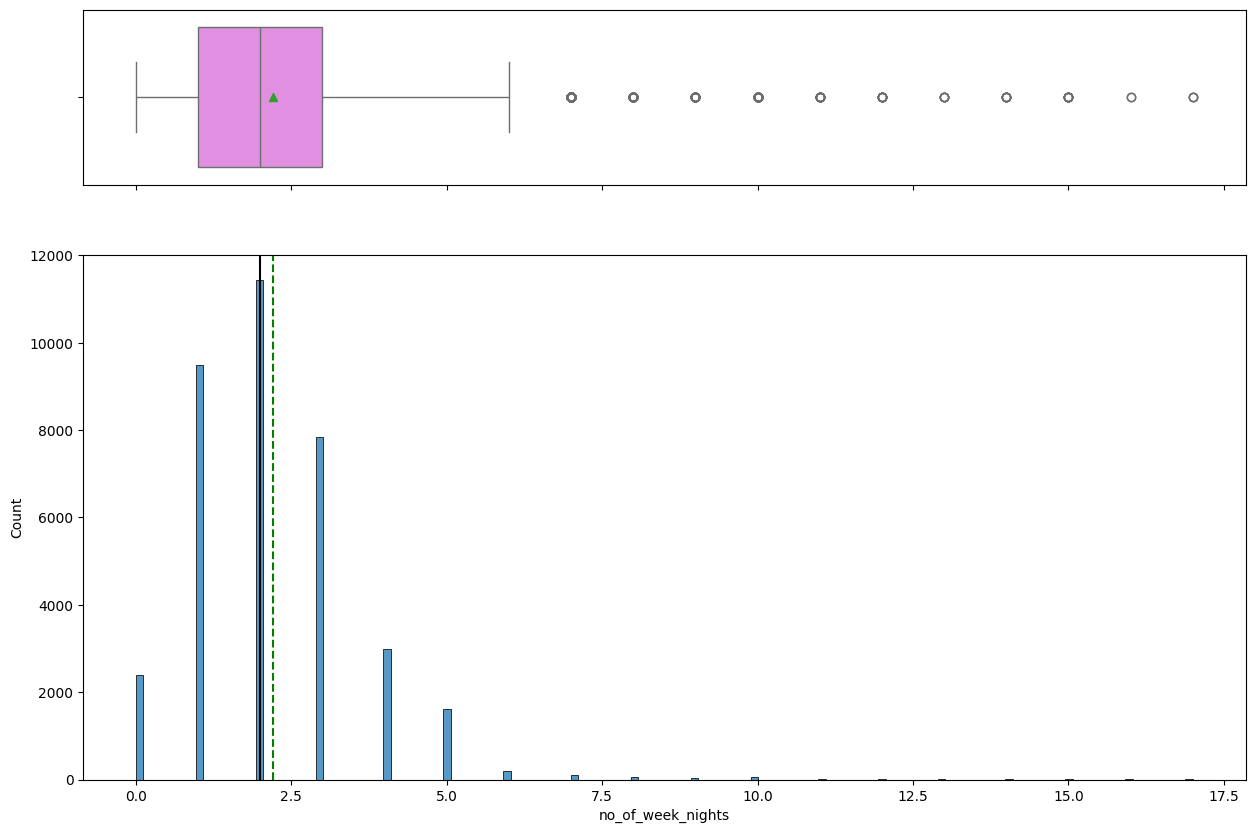

In [ ]:
histogram_boxplot(data,'no_of_week_nights', kde=False, bins=None)

* The range of number of week stay is from 0 to 3
* The distribution is little right skewed and there are some outliers in the data.

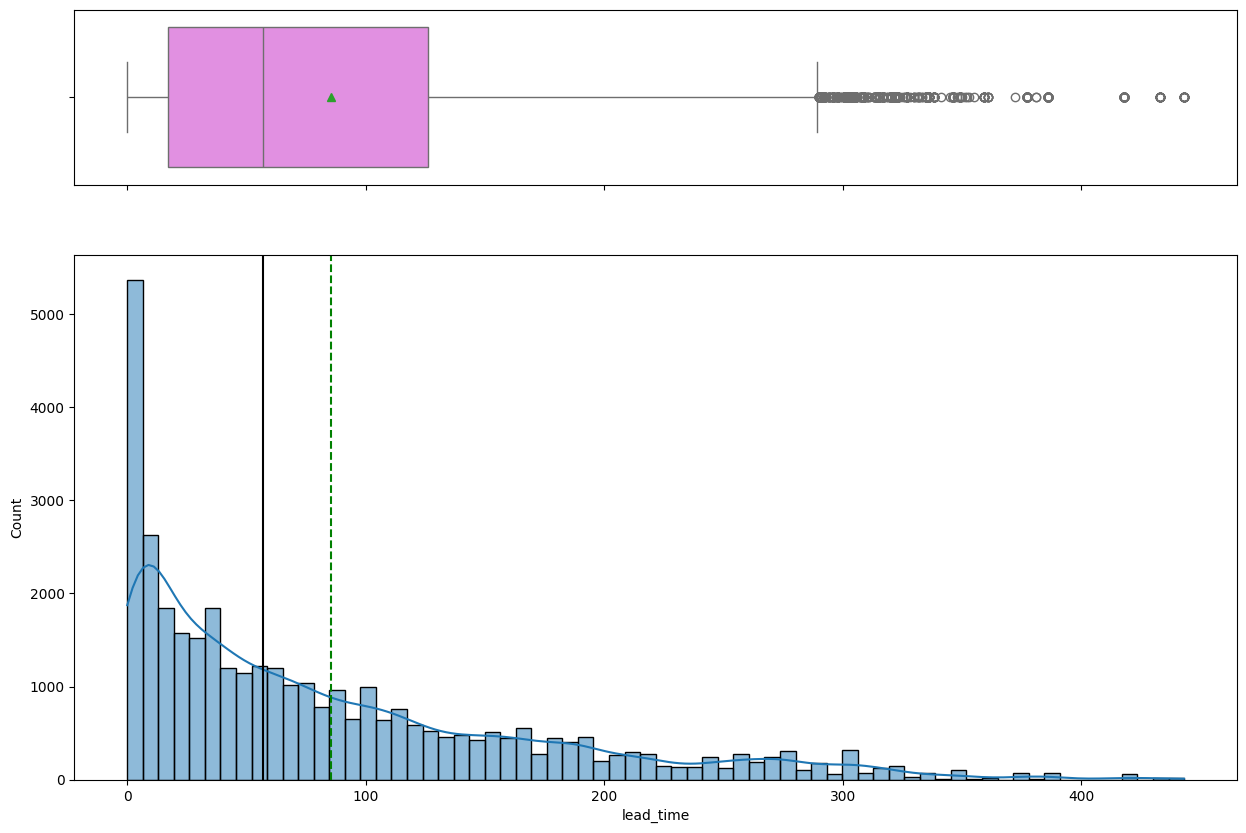

In [ ]:
histogram_boxplot(data,'lead_time', kde=True, bins=None)

* The Distribution is right skewed and there are so many outliers in the right side of the data.

* Most of the bookings have zero-day lead time which means the majority bookings were done on the same day.

* The average lead time is around 85 days which means most of the people like to book before 3 months of time of arrival.

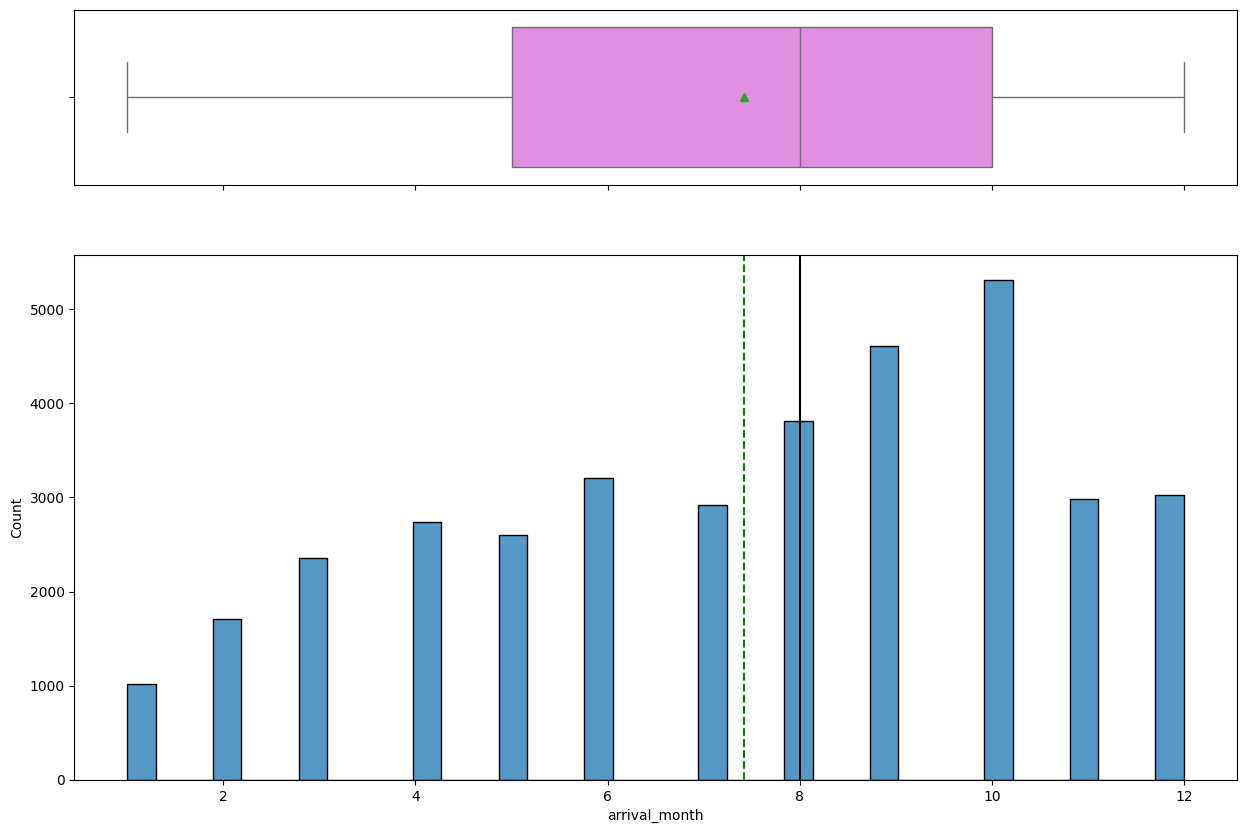

In [ ]:
histogram_boxplot(data,'arrival_month', kde=False, bins=None)

* The highest booking month is October which means people likes to visit the place during fall.

* There are less bookings during January and February month.

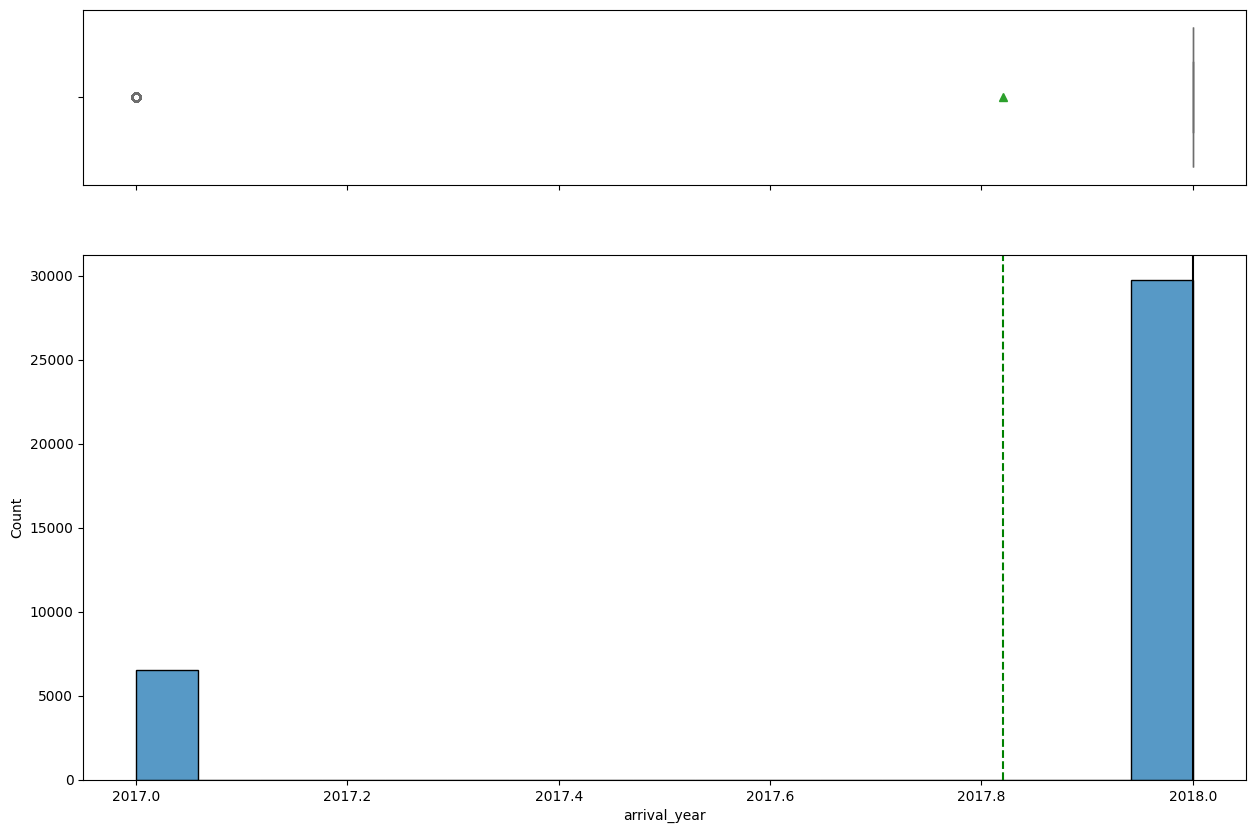

In [ ]:
histogram_boxplot(data,'arrival_year', kde=False, bins=None)

In [ ]:
data['arrival_year'].value_counts()

arrival_year
2018    29761
2017     6514
Name: count, dtype: int64

* The data is coming from 2017 and 2018 booking year.
* Most of the data is from 2018 year.

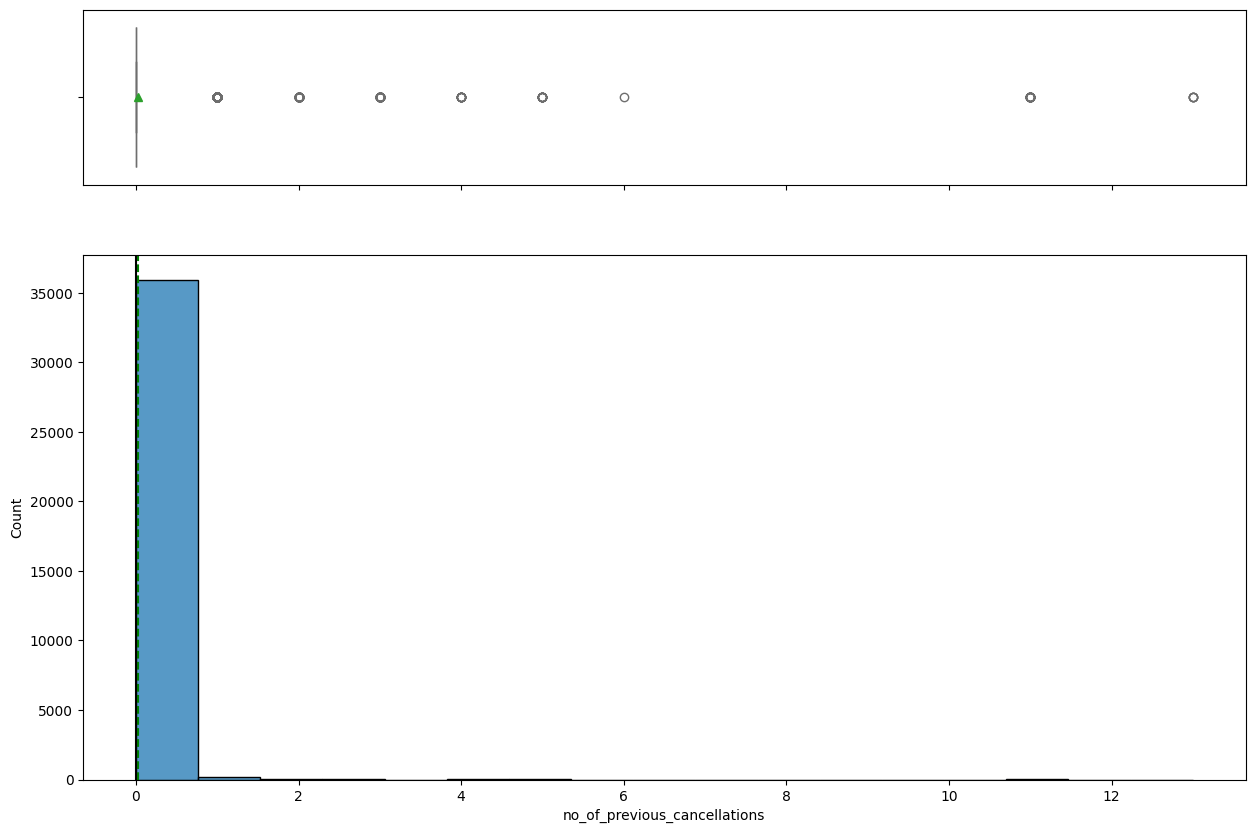

In [ ]:
histogram_boxplot(data,'no_of_previous_cancellations', kde=False, bins=None)

* Most of the previous cancellation is zero.
* There are some outliers in the data represents the number of previous cancellation  was between 3 to 11.

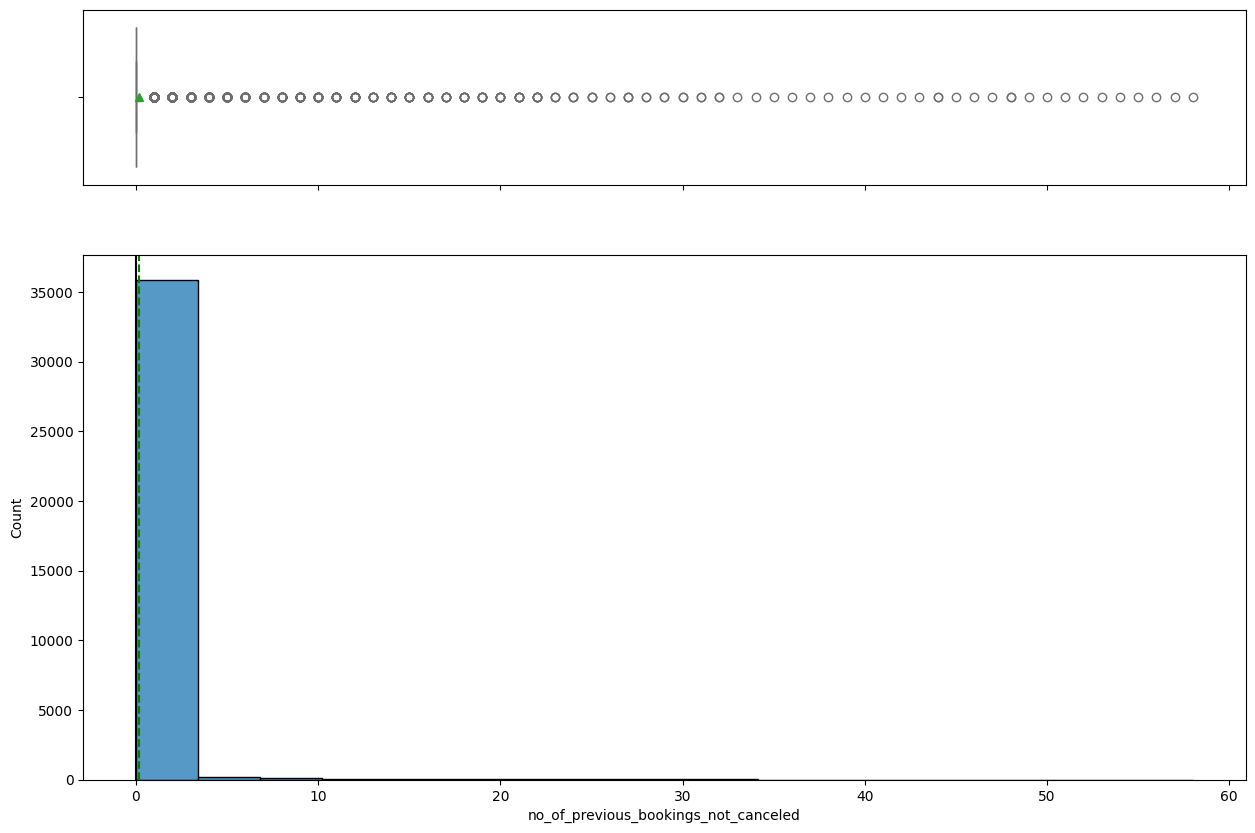

In [ ]:
histogram_boxplot(data,'no_of_previous_bookings_not_canceled', kde=False, bins=None)

* Most of number of bookings was not canceled which is zero which means most of the customers are visiting for the first time.

* The distribution is right skewed and there are so many outliers in the right side of the data.

* The number of bookings not canceled is ranges from 0 to 58 which means some of the customers are frequent and not canceling their bookings.

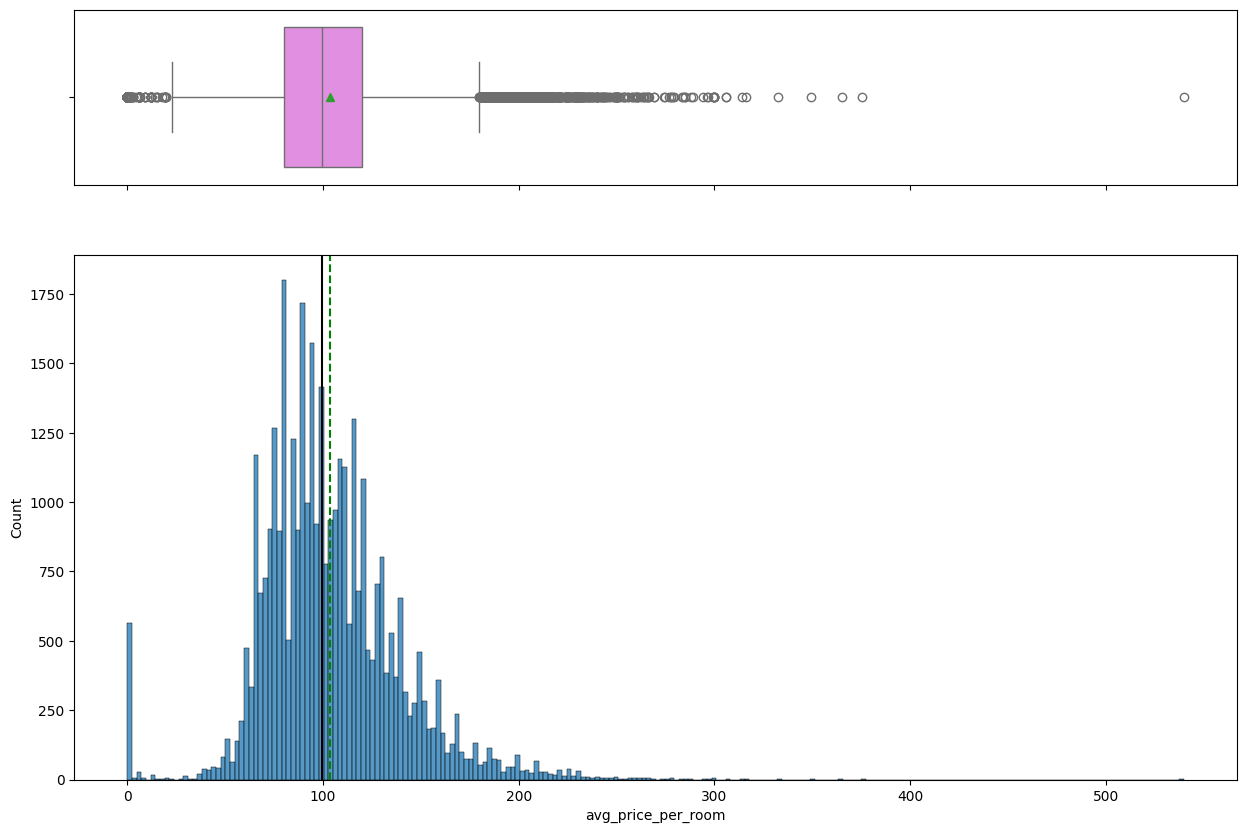

In [ ]:
histogram_boxplot(data,'avg_price_per_room', kde=False, bins=None)

* Average price per room is 100 euros in the data.

* The distribution is little right skewed.

* We can see lot of booking has 0  euros  which means we have some missing data.



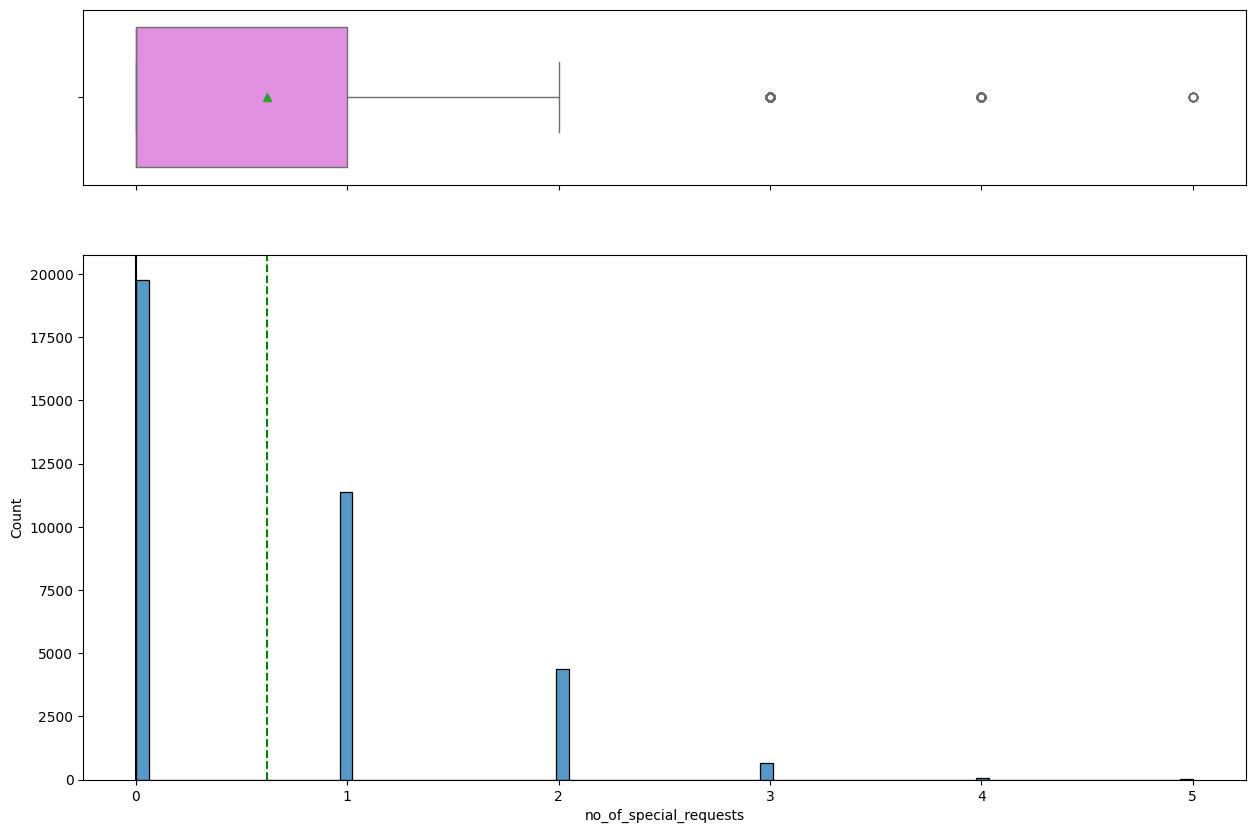

In [ ]:
histogram_boxplot(data,'no_of_special_requests', kde=False, bins=None)

* Most of the booking don’t have any special request.

* There is maximum 4 request made by a customer.

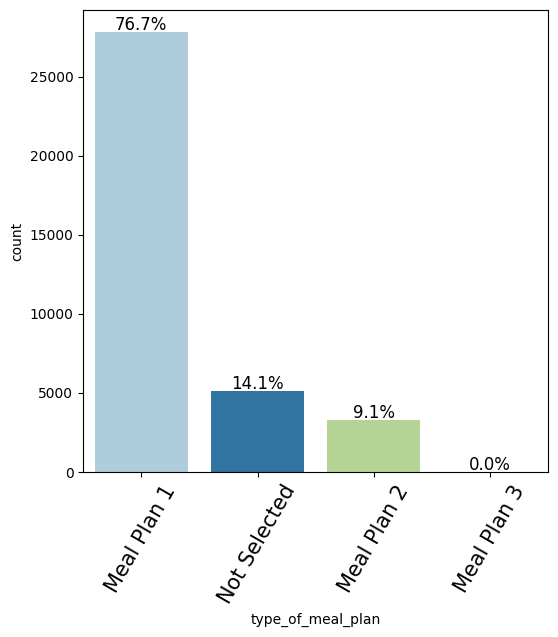

In [ ]:
labeled_barplot(data, "type_of_meal_plan", perc=True);


* 76.7% of customer chose meal plan1.
* About 14% of them hasn’t selected any meal plan.

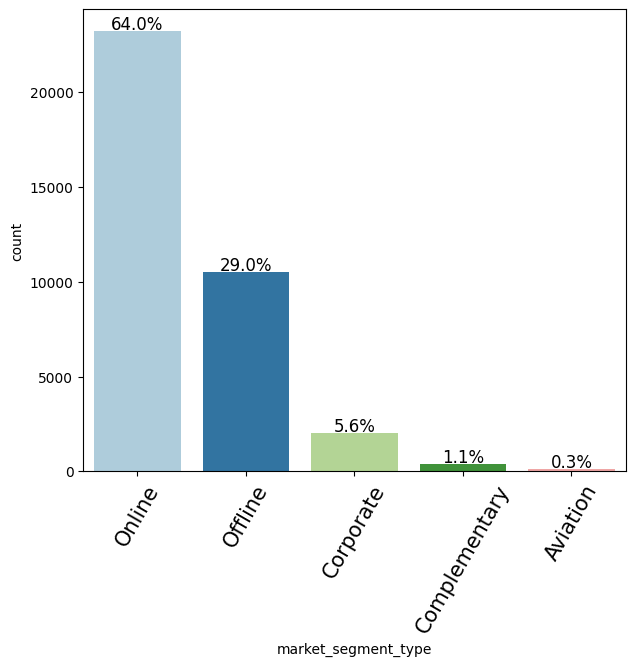

In [ ]:
labeled_barplot(data, "market_segment_type", perc=True)

* 64% of customer booked the hotel online, which means more than 50% of population prefer booking online.

* 29% of customer booked the hotel offline.

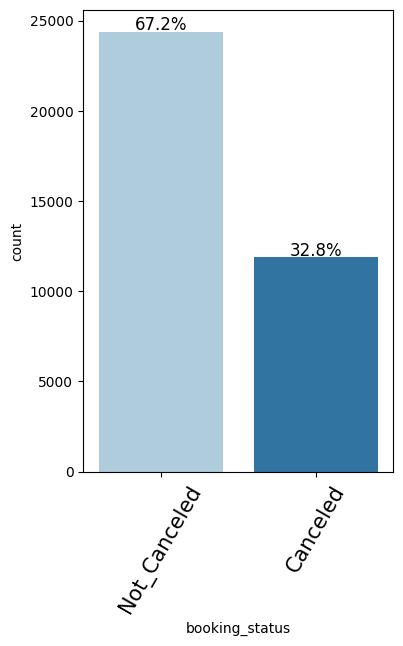

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

* About 33% of customer canceled booking and 67% of them retained their booking.

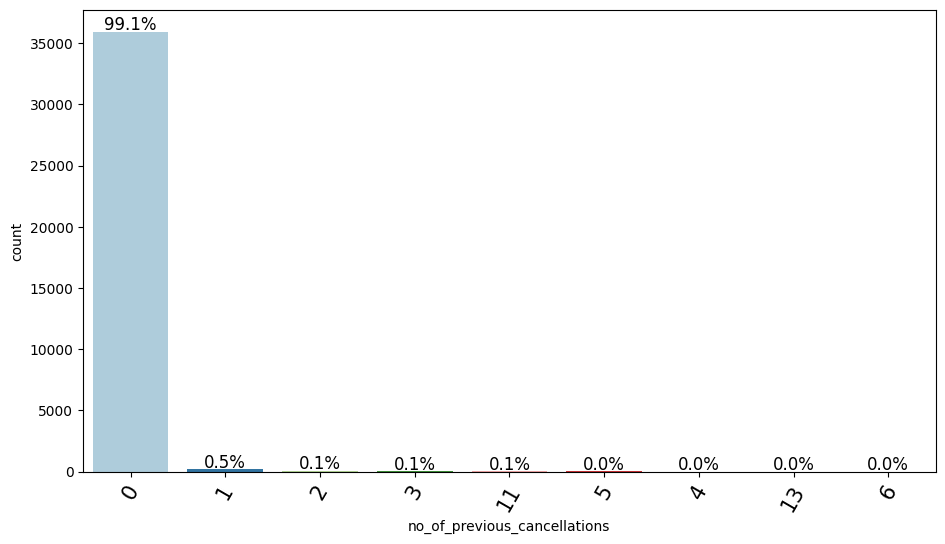

In [ ]:
labeled_barplot(data, "no_of_previous_cancellations", perc=True)

* About 99% of the bookings has zero previous cancellation.

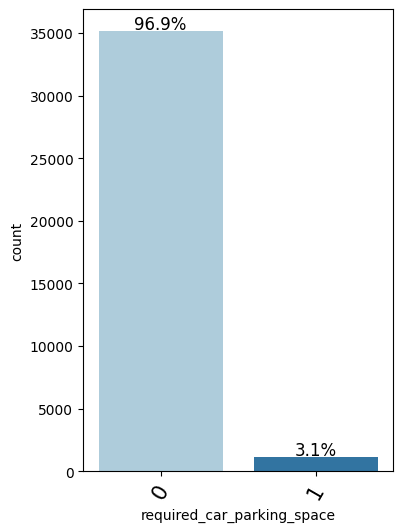

In [ ]:
labeled_barplot(data, "required_car_parking_space", perc=True)

* Only 3% of bookings has booked parking space.

### Bivariate Analysis

In [ ]:
# Defining a function to create barplot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

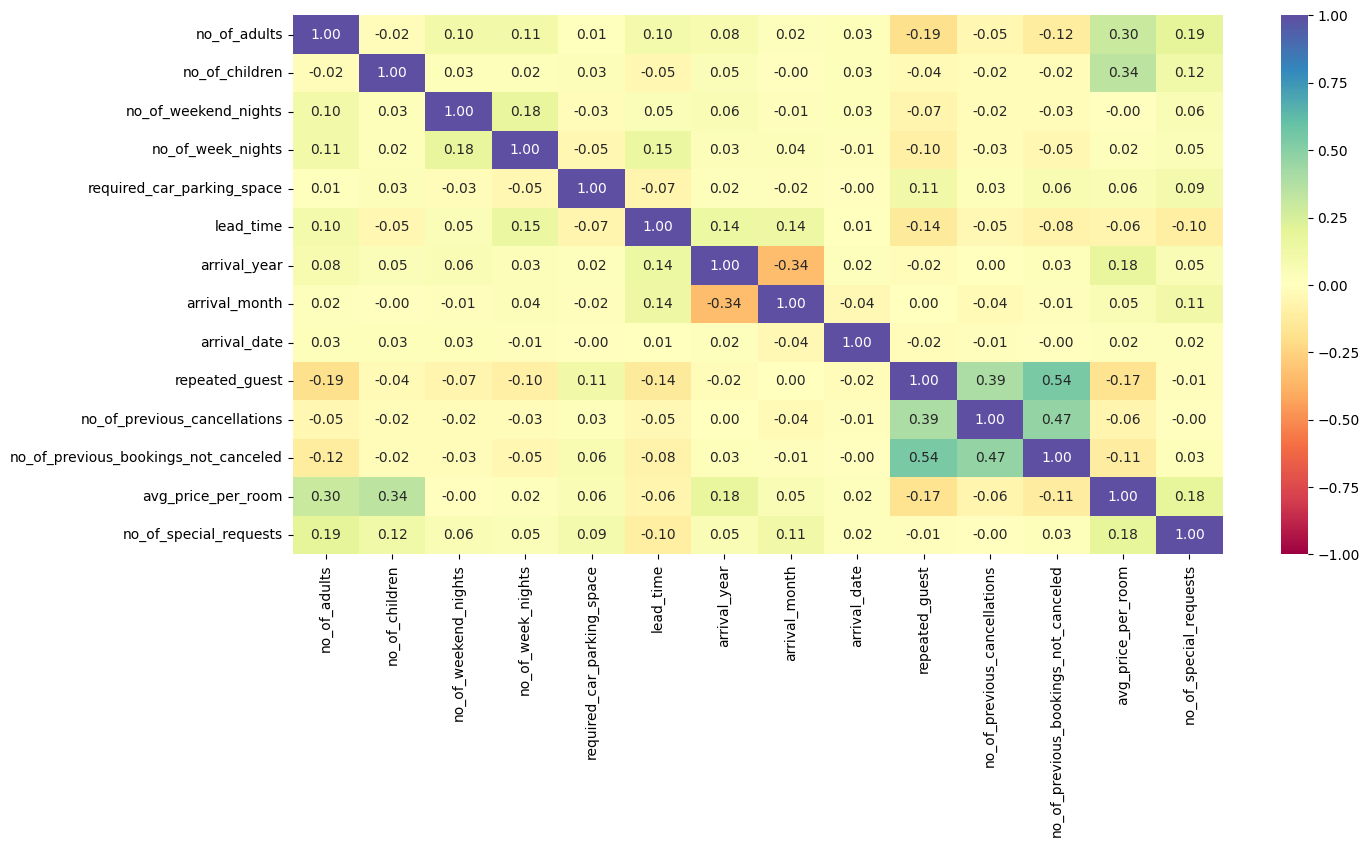

In [ ]:
plt.figure(figsize=(15, 7))
# Selecting only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is possitive corelation between reapeated guest and no. of privious bookings not canceled. also between no. of previous cancellation and not canceled.
* Ther is also possitive corelation between av.price per room and no. of adults and children. Which means price increase when no. of people increase.

booking_status  Canceled  Not_Canceled    All
no_of_adults                                 
All                11885         24390  36275
2                   9119         16989  26108
1                   1856          5839   7695
3                    863          1454   2317
0                     44            95    139
4                      3            13     16
------------------------------------------------------------------------------------------------------------------------


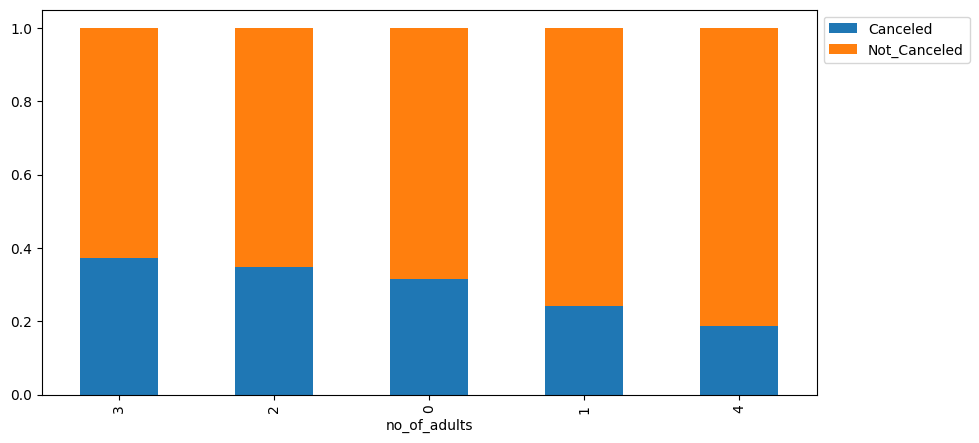

In [ ]:
stacked_barplot(data, "no_of_adults", "booking_status")

* 4 and 1 no.of adults tends to not caceling the booking comaring to others.

booking_status  Canceled  Not_Canceled    All
no_of_children                               
All                11885         24390  36275
0                  10882         22695  33577
1                    540          1078   1618
2                    457           601   1058
3                      5            14     19
9                      1             1      2
10                     0             1      1
------------------------------------------------------------------------------------------------------------------------


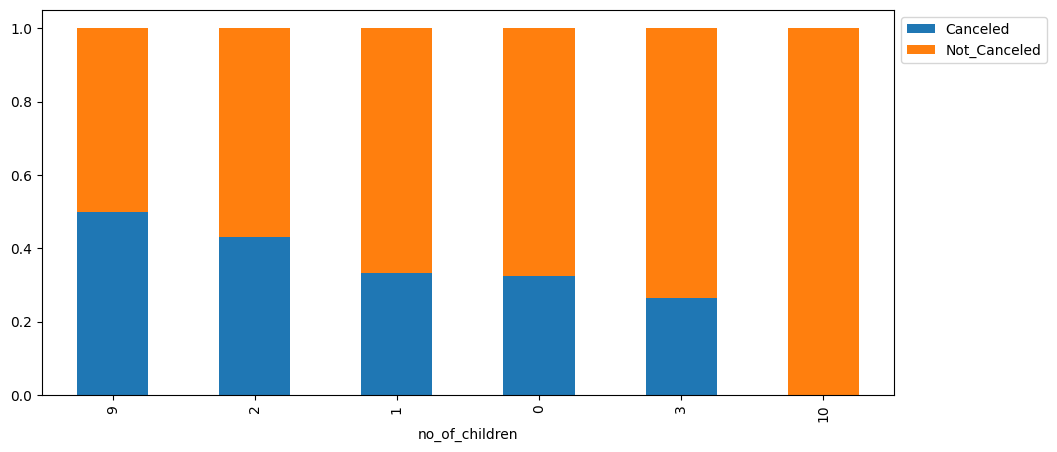

In [ ]:
stacked_barplot(data, "no_of_children", "booking_status")

* having 2 no. of childrens in the data canceled more bookings than others.
* 9 and 10 no. childrens seems to be outliers or might be wrong data.

booking_status        Canceled  Not_Canceled    All
no_of_weekend_nights                               
All                      11885         24390  36275
0                         5093         11779  16872
1                         3432          6563   9995
2                         3157          5914   9071
4                           83            46    129
3                           74            79    153
5                           29             5     34
6                           16             4     20
7                            1             0      1
------------------------------------------------------------------------------------------------------------------------


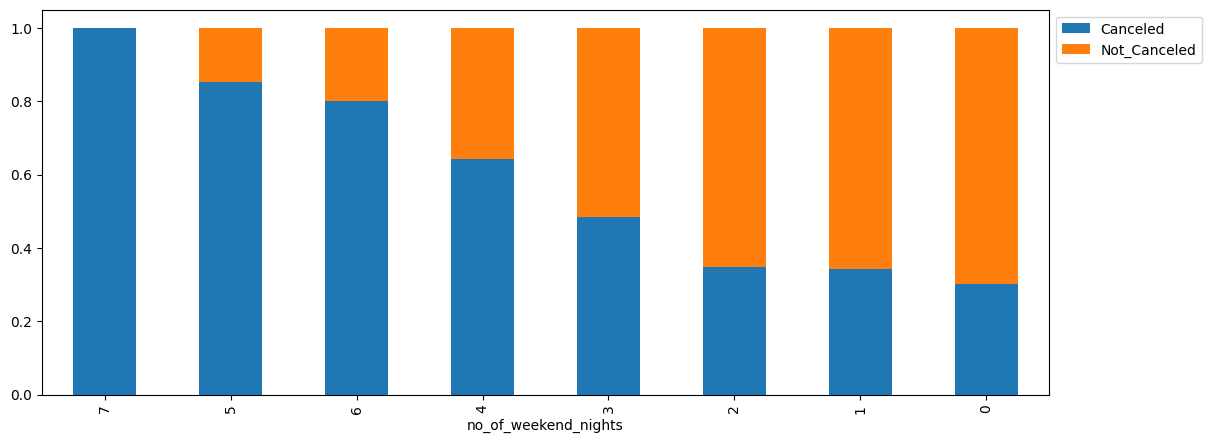

In [ ]:
stacked_barplot(data, "no_of_weekend_nights", "booking_status")

* More than 2 no. of weekend nights canceled bookings more frequently.
* There was only one booking with 7 no of weekend night which was canceled.

booking_status     Canceled  Not_Canceled    All
no_of_week_nights                               
All                   11885         24390  36275
2                      3997          7447  11444
3                      2574          5265   7839
1                      2572          6916   9488
4                      1143          1847   2990
0                       679          1708   2387
5                       632           982   1614
6                        88           101    189
10                       53             9     62
7                        52            61    113
8                        32            30     62
9                        21            13     34
11                       14             3     17
15                        8             2     10
12                        7             2      9
13                        5             0      5
14                        4             3      7
16                        2             0      2
17                  

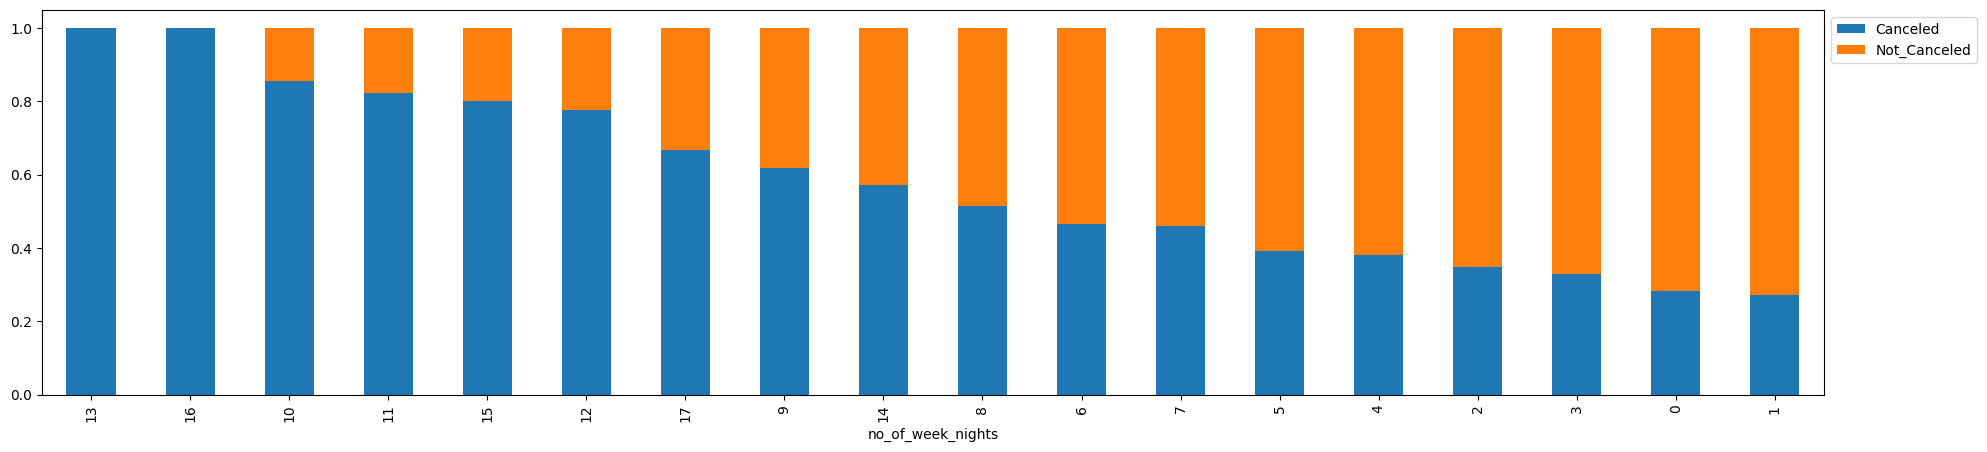

In [ ]:
stacked_barplot(data, "no_of_week_nights", "booking_status")

* more than 50% of bookings were canceled whoever booked for more than 5 no of week nights.
* So more than 5 no. of week nights bookings tends to more probability of canceling.

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   11885         24390  36275
Meal Plan 1            8679         19156  27835
Not Selected           1699          3431   5130
Meal Plan 2            1506          1799   3305
Meal Plan 3               1             4      5
------------------------------------------------------------------------------------------------------------------------


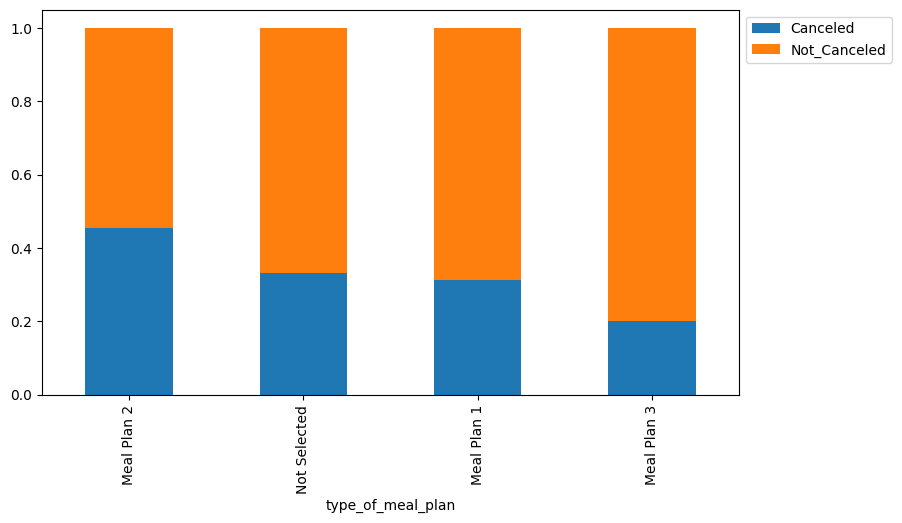

In [ ]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

* Choosing a meal plan 3 was not canceling the booking compare to others.

booking_status              Canceled  Not_Canceled    All
required_car_parking_space                               
All                            11885         24390  36275
0                              11771         23380  35151
1                                114          1010   1124
------------------------------------------------------------------------------------------------------------------------


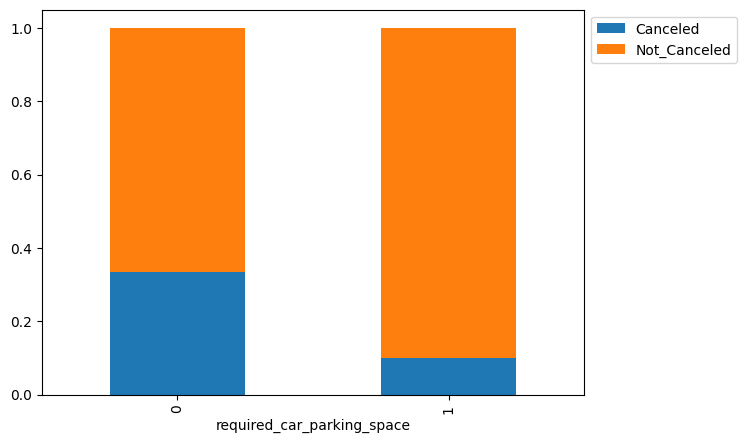

In [ ]:
stacked_barplot(data, "required_car_parking_space", "booking_status")

* Bookings with required car parking space tends to not canceling the booking.

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    11885         24390  36275
Room_Type 1             9072         19058  28130
Room_Type 4             2069          3988   6057
Room_Type 6              406           560    966
Room_Type 2              228           464    692
Room_Type 5               72           193    265
Room_Type 7               36           122    158
Room_Type 3                2             5      7
------------------------------------------------------------------------------------------------------------------------


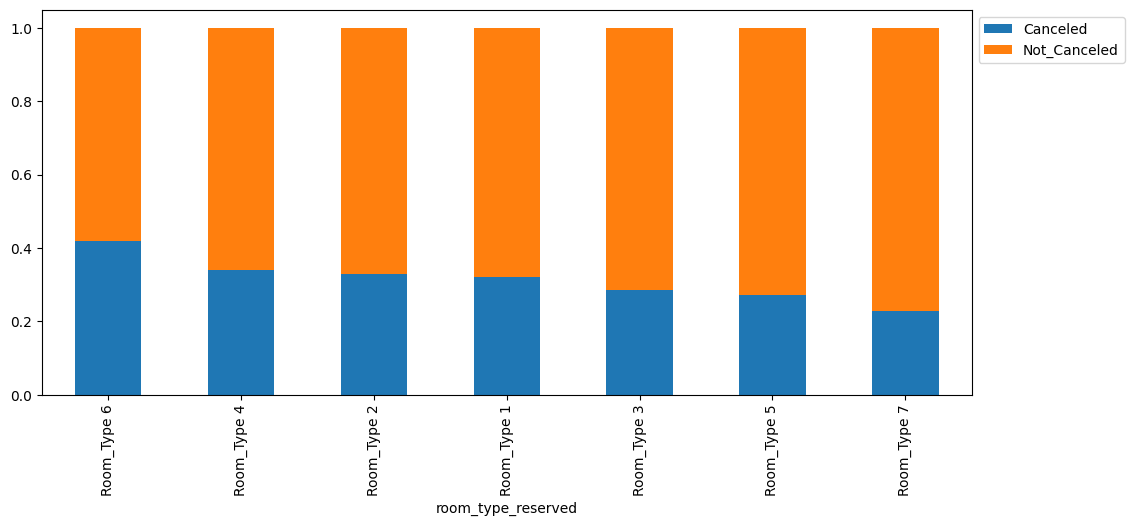

In [ ]:
stacked_barplot(data, "room_type_reserved", "booking_status")

* There is no variation in the data related to room type reserved which is not kind of affecting the canceling booking.

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


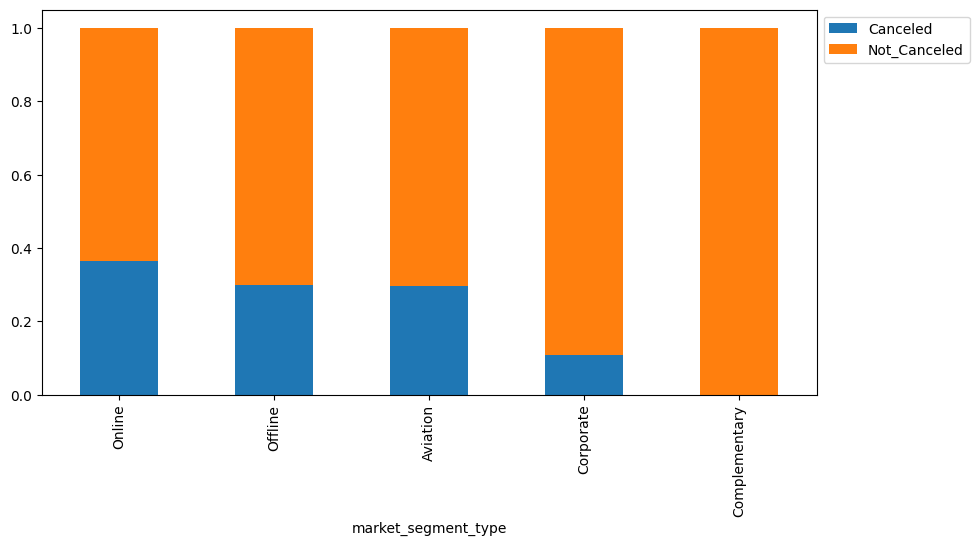

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Online booking tends to canceled the booking compare to offline booking.

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


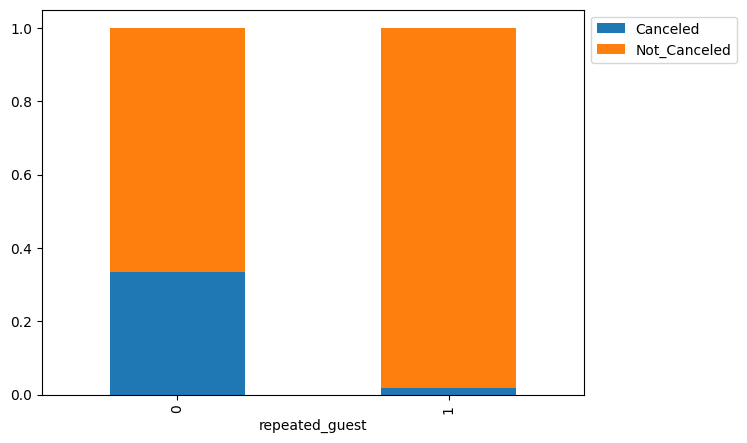

In [ ]:
stacked_barplot(data, "repeated_guest", "booking_status")

* Repeated guest tends to not canceling the booking compare to the new visitors.

booking_status                Canceled  Not_Canceled    All
no_of_previous_cancellations                               
All                              11885         24390  36275
0                                11869         24068  35937
1                                   11           187    198
13                                   4             0      4
3                                    1            42     43
2                                    0            46     46
5                                    0            11     11
4                                    0            10     10
11                                   0            25     25
6                                    0             1      1
------------------------------------------------------------------------------------------------------------------------


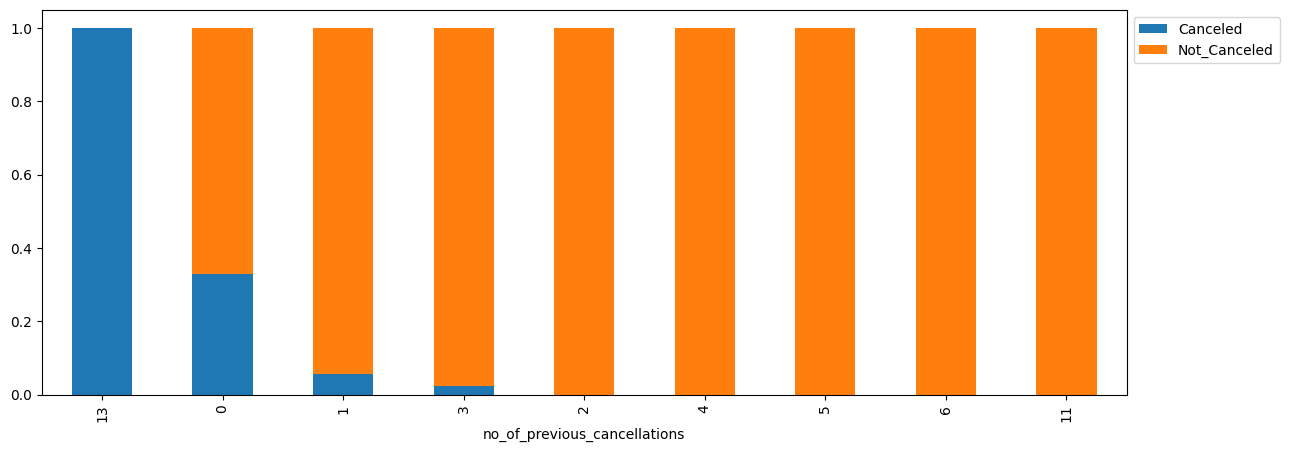

In [ ]:
stacked_barplot(data, "no_of_previous_cancellations", "booking_status")

* No. of previous cancellation seems not influences the rate of canceling the bookings.
* zero previous cancellation are also canceling the bookings
* 11 no. of previous cancellation are not canceling the bookings.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


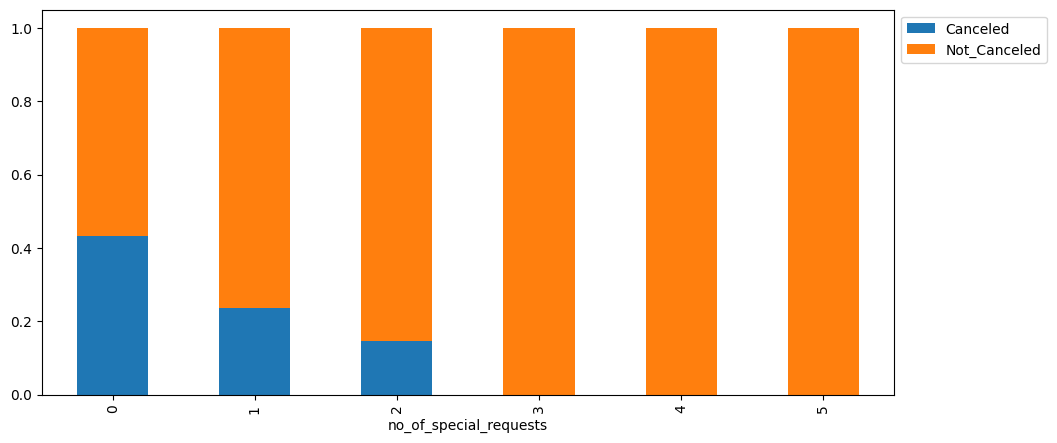

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status")

* If the no. of special request increases, the booking is not getting canceled.
* If there is no special request made than it is more chance to gettting cancel the booking.

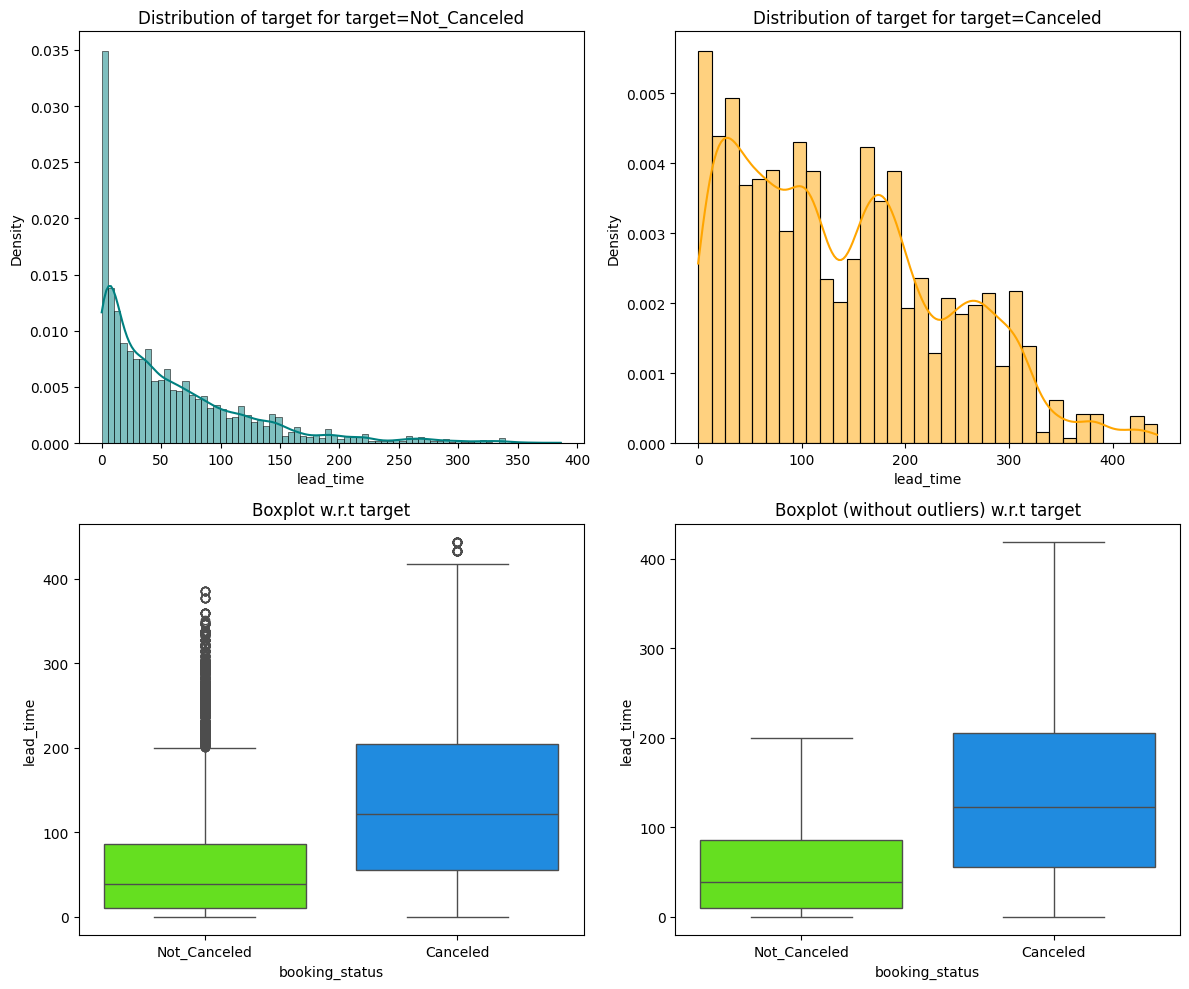

In [ ]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

* If the lead time is between 0 and 90 days, the booking is not getting canceled.
* If the lead time is more than 100 days, there is more probability of booking getting canceled.

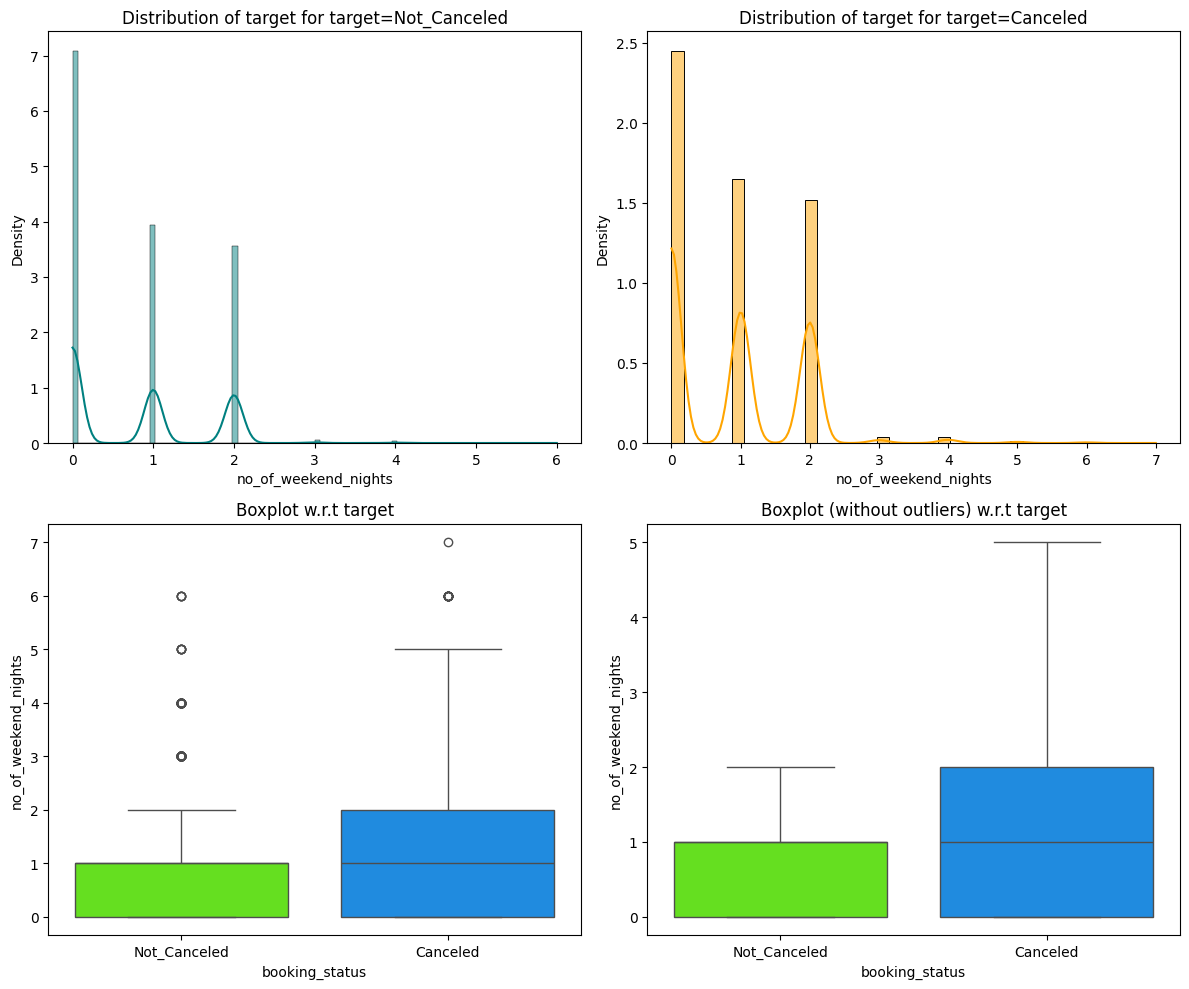

In [ ]:
distribution_plot_wrt_target(data, "no_of_weekend_nights", "booking_status")

* More than 1 weekend night booking is getting more probability of getting canceled.

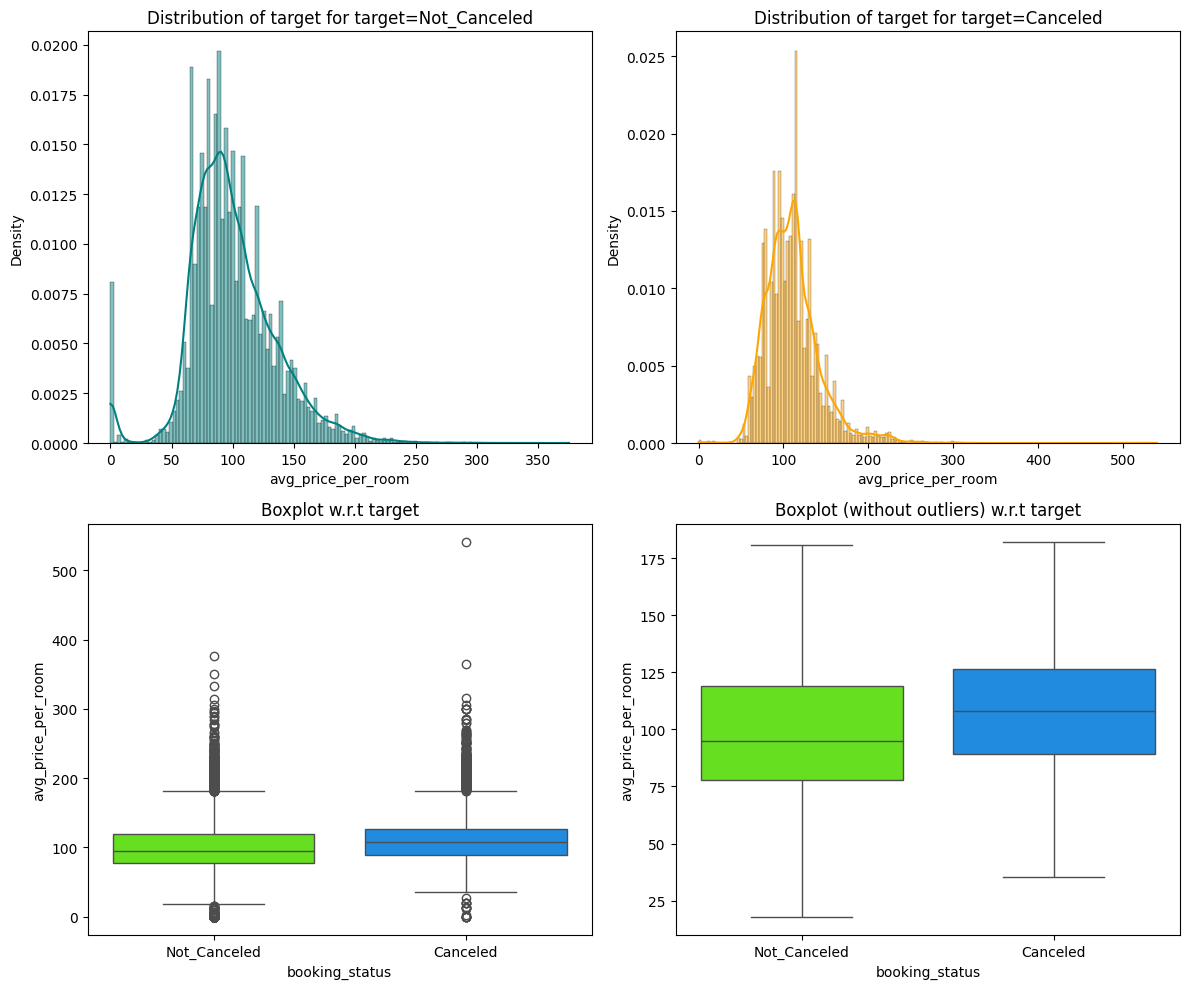

In [ ]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

* The avg. price per room for the canceled booking  is little higher than the booking was not canceled.
* It seems avg price per booking is affecting the booking cancellation

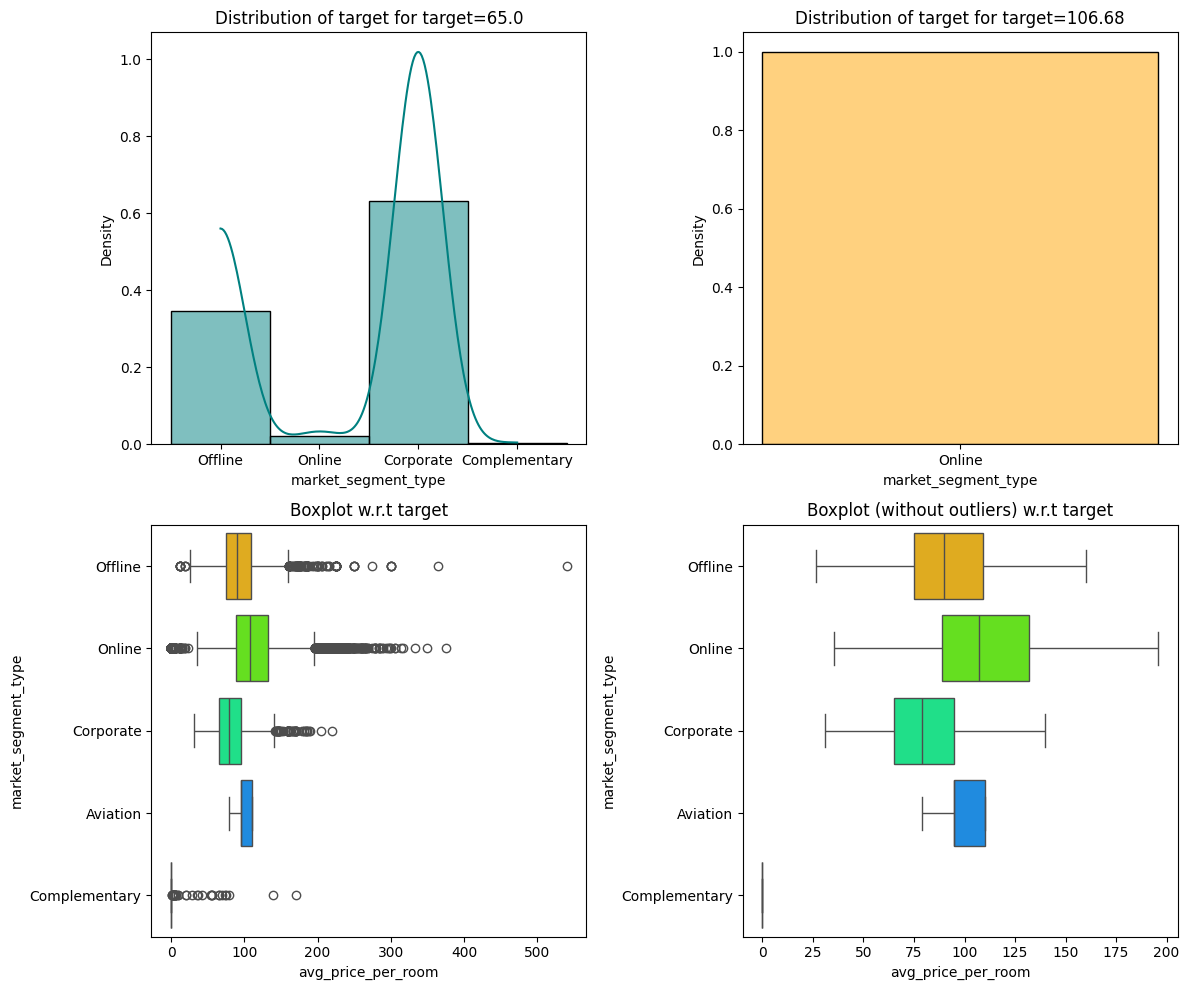

In [ ]:
distribution_plot_wrt_target(data, "market_segment_type", "avg_price_per_room")

* When they are booking online, avg. price of the room is higher compare to offline and corporate.

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     11885         24390  36275
Online                   8475         14739  23214
Offline                  3153          7375  10528
Corporate                 220          1797   2017
Aviation                   37            88    125
Complementary               0           391    391
------------------------------------------------------------------------------------------------------------------------


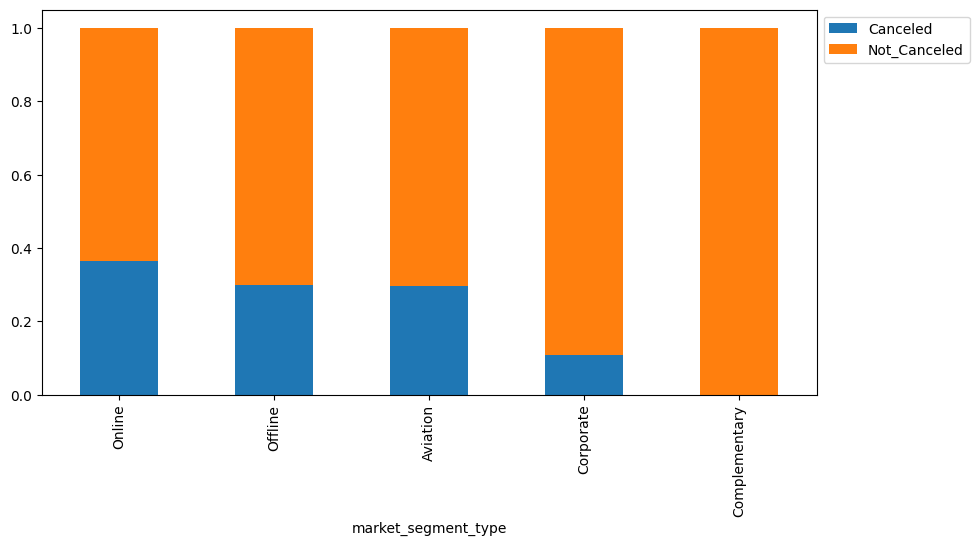

In [ ]:
stacked_barplot(data, "market_segment_type", "booking_status")

* Online bookings seems to cancel the bookings compare to offline and others.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

**1. What are the busiest months in the hotel?**

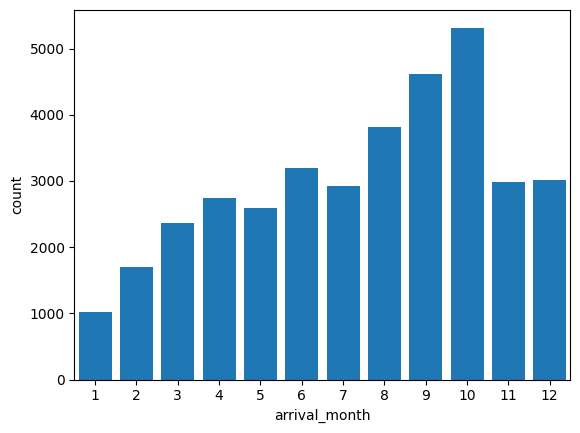

In [ ]:
sns.countplot(data=data, x='arrival_month', hue = data[data['booking_status']=='Not Canceled']);

* October, September and August months are the busiest months in the hotel
* We will check the data the most booking canceled

**2. Which market segment do most of the guests come from?**

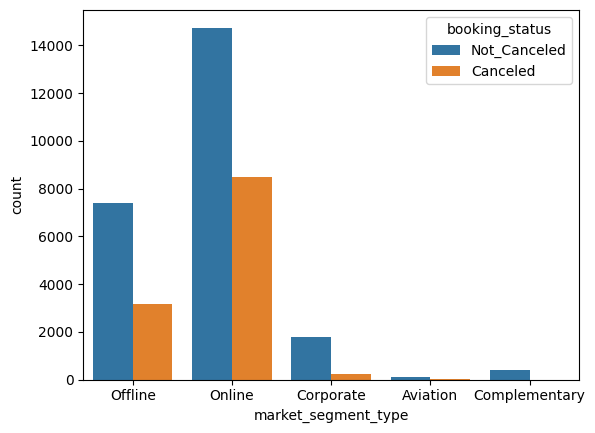

In [ ]:
sns.countplot(data=data, x='market_segment_type', hue='booking_status');

* 'Online' booking market segment type is the one from which most of the guests come from.

**4. What percentage of bookings are canceled?**

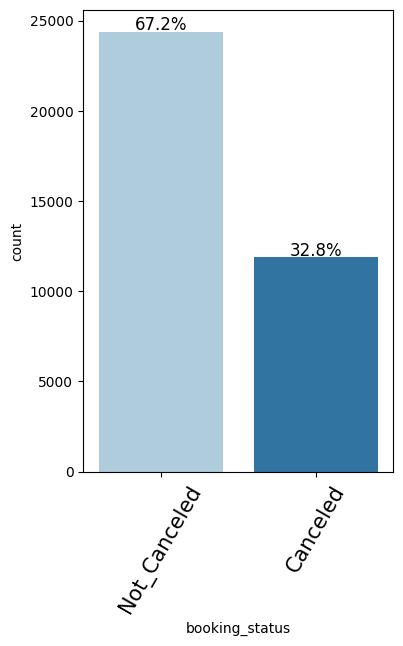

In [ ]:
labeled_barplot(data, "booking_status", perc=True)

* 32.8% of bookings are canceled.

**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


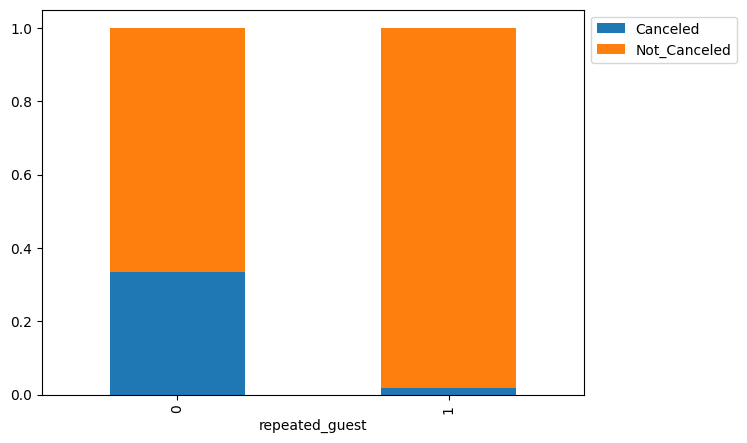

In [ ]:
stacked_barplot(data, "repeated_guest", "booking_status");

*

In [ ]:
data.groupby('repeated_guest')['booking_status'].value_counts(normalize=True)

repeated_guest  booking_status
0               Not_Canceled      0.664196
                Canceled          0.335804
1               Not_Canceled      0.982796
                Canceled          0.017204
Name: proportion, dtype: float64

* 1 represents repeated guest which means 1.7% of repeated guests canceled the booking.

***6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation? ***

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


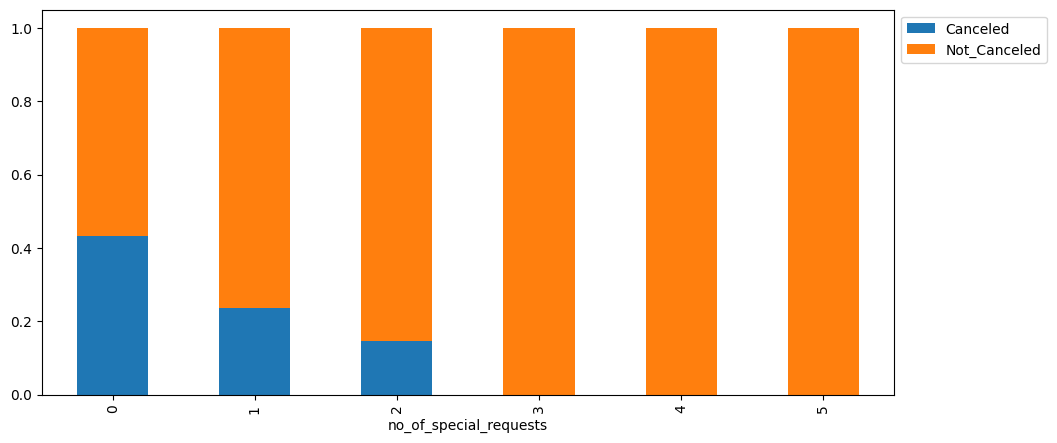

In [ ]:
stacked_barplot(data, "no_of_special_requests", "booking_status");

In [ ]:
data.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True)

no_of_special_requests  booking_status
0                       Not_Canceled      0.567932
                        Canceled          0.432068
1                       Not_Canceled      0.762332
                        Canceled          0.237668
2                       Not_Canceled      0.854033
                        Canceled          0.145967
3                       Not_Canceled      1.000000
4                       Not_Canceled      1.000000
5                       Not_Canceled      1.000000
Name: proportion, dtype: float64

* 3 or more than 3 no. of requests from a customer were not among the one who canceled the booking. Whoever did not do any special request which was about 43% of them canceled the booking. So yes no. of special requests affects the booking cancellation.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing value treatment
We saw that we had 139 no. of bookings had a 0 adults, we will check tha data for that. Also we saw 0's in average price per room. We will look into that.

In [ ]:
data[data['avg_price_per_room']==0]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
63      INN00064             1               0                     0   
145     INN00146             1               0                     0   
209     INN00210             1               0                     0   
266     INN00267             1               0                     0   
267     INN00268             1               0                     2   
...          ...           ...             ...                   ...   
35983   INN35984             1               0                     0   
36080   INN36081             1               0                     1   
36114   INN36115             1               0                     0   
36217   INN36218             2               0                     2   
36250   INN36251             1               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
63                     1       Meal Plan 1                           0   
145                    2       Meal Plan 1                           0   
209                    0       Meal Plan 1                           0   
266                    2       Meal Plan 1                           0   
267                    1       Meal Plan 1                           0   
...                  ...               ...                         ...   
35983                  1       Meal Plan 1                           0   
36080                  1       Meal Plan 1                           0   
36114                  1       Meal Plan 1                           0   
36217                  1       Meal Plan 1                           0   
36250                  2       Meal Plan 2                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
63           Room_Type 1          2          2017              9   
145          Room_Type 1         13          2018              6   
209          Room_Type 1          4          2018              2   
266          Room_Type 1          1          2017              8   
267          Room_Type 1          4          2017              8   
...                  ...        ...           ...            ...   
35983        Room_Type 7          0          2018              6   
36080        Room_Type 7          0          2018              3   
36114        Room_Type 1          1          2018              3   
36217        Room_Type 2          3          2017              8   
36250        Room_Type 1          6          2017             12   

       arrival_date market_segment_type  repeated_guest  \
63               10       Complementary               0   
145               1       Complementary               1   
209              27       Complementary               0   
266              12       Complementary               1   
267              23       Complementary               0   
...             ...                 ...             ...   
35983             7       Complementary               1   
36080            21       Complementary               1   
36114             2              Online               0   
36217             9              Online               0   
36250            10              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
63                                0                                     0   
145                               3                                     5   
209                               0                                     0   
266                               0                                     1   
267                               0                                     0   
...                             ...                                   ...   
35983                             4                                    17   
36080                             3                                    15   
36114                            

In [ ]:
data['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

* we have 545 bookings with 0 average price, which can be complememtary.

### Feature engineering

In [ ]:
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

* We will drop 'booking_ID' because that is unique ID


In [ ]:
data.drop('Booking_ID', axis=1, inplace=True)

### Outlier detection and treatment (if needed)

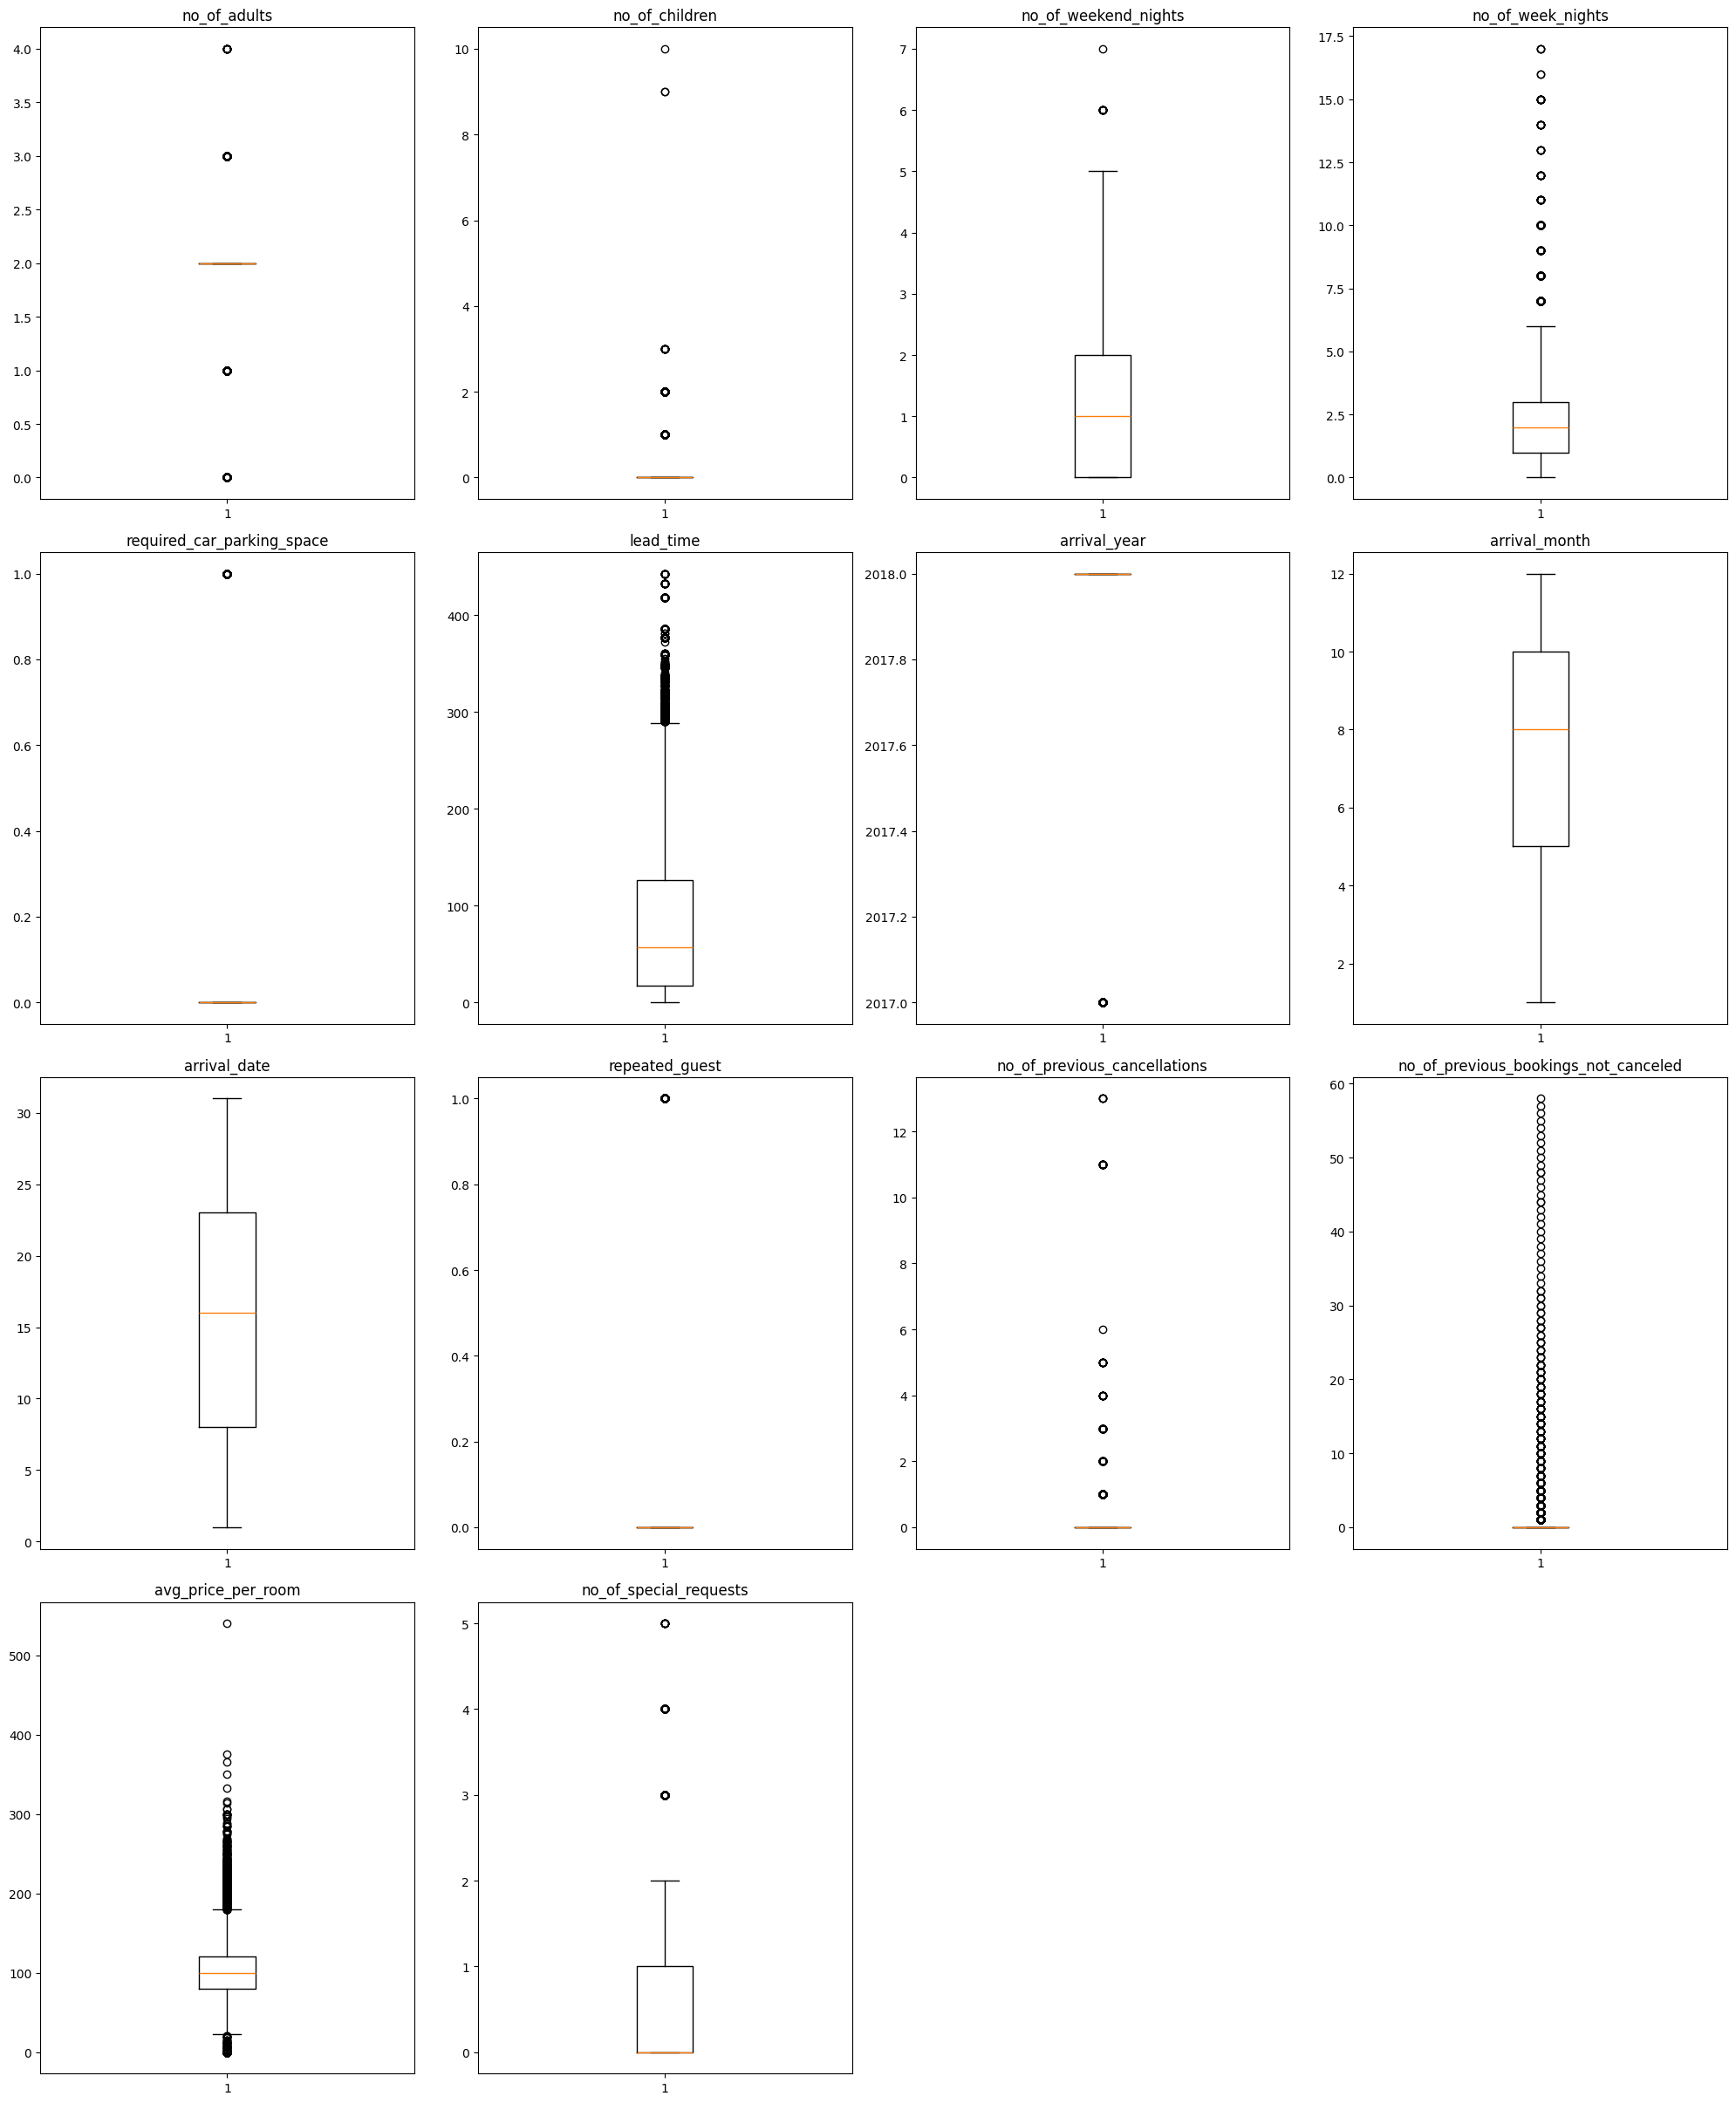

In [ ]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* We will not impute outliers because it's a true values.
* We can see there is a data in 'average price' is more than 500 euros, we will treat them with upper whisker.
* There is also 9 and 10 no. of children, we will replace with 3 no. of children.


In [ ]:
# Calculating the 25th quantile
Q1 = data["avg_price_per_room"].quantile(0.25)

# Calculating the 75th quantile
Q3 = data['avg_price_per_room'].quantile(0.75)

# Calculating IQR
IQR = Q3 - Q1

# Calculating value of upper whisker
Upper_Whisker = Q3 + 1.5 * IQR
Upper_Whisker

np.float64(179.55)

In [ ]:
# Assigning > 500 euros value to upper whisker
data.loc[data["avg_price_per_room"] >= 500, "avg_price_per_room"] = Upper_Whisker

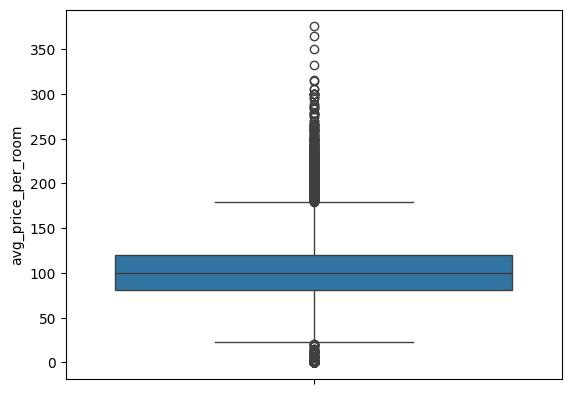

In [ ]:
sns.boxplot(data['avg_price_per_room']);

In [ ]:
# replacing 9, and 10 children with 3
data["no_of_children"] = data["no_of_children"].replace([9, 10], 3)

### Preparing data for modeling

In [ ]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [ ]:
# Converting Booking status
data["booking_status"] = data["booking_status"].apply(
    lambda x: 1 if x == "Canceled" else 0
)

In [ ]:
# Creating dummy variables.
data = pd.get_dummies(data, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'], drop_first=True).astype(float)

In [ ]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0           2.0             0.0                   1.0                2.0   
1           2.0             0.0                   2.0                3.0   
2           1.0             0.0                   2.0                1.0   
3           2.0             0.0                   0.0                2.0   
4           2.0             0.0                   1.0                1.0   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                         0.0      224.0        2017.0           10.0   
1                         0.0        5.0        2018.0           11.0   
2                         0.0        1.0        2018.0            2.0   
3                         0.0      211.0        2018.0            5.0   
4                         0.0       48.0        2018.0            4.0   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0           2.0             0.0                           0.0   
1           6.0             0.0                           0.0   
2          28.0             0.0                           0.0   
3          20.0             0.0                           0.0   
4          11.0             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   0.0               65.00   
1                                   0.0              106.68   
2                                   0.0               60.00   
3                                   0.0              100.00   
4                                   0.0               94.50   

   no_of_special_requests  booking_status  type_of_meal_plan_Meal Plan 2  \
0                     0.0             0.0                            0.0   
1                     1.0             0.0                            0.0   
2                     0.0             1.0                            0.0   
3                     0.0             1.0                            0.0   
4                     0.0             1.0                            0.0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                            0.0                             0.0   
1                            0.0                             1.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             1.0   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2            

In [ ]:
# specifying the independent  and dependent variables
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

# adding a constant to the independent variables
X = sm.add_constant(X)


# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 28)
Shape of test set :  (10883, 28)
Percentage of classes in training set:
booking_status
0.0    0.670644
1.0    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0.0    0.676376
1.0    0.323624
Name: proportion, dtype: float64


In [ ]:
data.shape

(36275, 28)

In [ ]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0           2.0             0.0                   1.0                2.0   
1           2.0             0.0                   2.0                3.0   
2           1.0             0.0                   2.0                1.0   
3           2.0             0.0                   0.0                2.0   
4           2.0             0.0                   1.0                1.0   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                         0.0      224.0        2017.0           10.0   
1                         0.0        5.0        2018.0           11.0   
2                         0.0        1.0        2018.0            2.0   
3                         0.0      211.0        2018.0            5.0   
4                         0.0       48.0        2018.0            4.0   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0           2.0             0.0                           0.0   
1           6.0             0.0                           0.0   
2          28.0             0.0                           0.0   
3          20.0             0.0                           0.0   
4          11.0             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   0.0               65.00   
1                                   0.0              106.68   
2                                   0.0               60.00   
3                                   0.0              100.00   
4                                   0.0               94.50   

   no_of_special_requests  booking_status  type_of_meal_plan_Meal Plan 2  \
0                     0.0             0.0                            0.0   
1                     1.0             0.0                            0.0   
2                     0.0             1.0                            0.0   
3                     0.0             1.0                            0.0   
4                     0.0             1.0                            0.0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                            0.0                             0.0   
1                            0.0                             1.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             1.0   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2            

## EDA

- It is a good idea to explore the data once again after manipulating it.

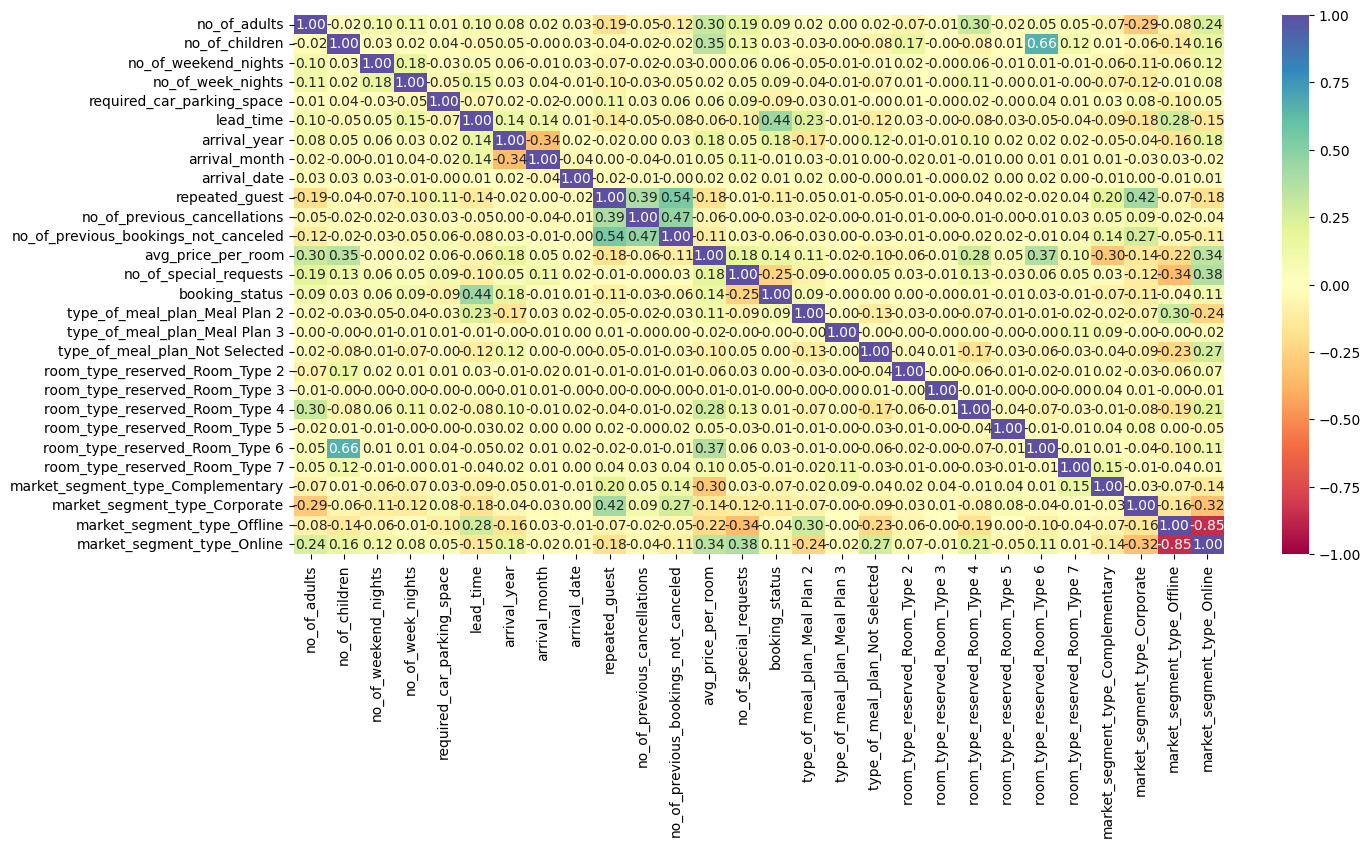

In [ ]:
plt.figure(figsize=(15, 7))
# Selecting only numerical features for correlation analysis
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [ ]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                   3.949769e+07
no_of_adults                            1.351135e+00
no_of_children                          2.093583e+00
no_of_weekend_nights                    1.069484e+00
no_of_week_nights                       1.095711e+00
required_car_parking_space              1.039972e+00
lead_time                               1.395175e+00
arrival_year                            1.431904e+00
arrival_month                           1.276334e+00
arrival_date                            1.006795e+00
repeated_guest                          1.783576e+00
no_of_previous_cancellations            1.395693e+00
no_of_previous_bookings_not_canceled    1.652000e+00
avg_price_per_room                      2.068603e+00
no_of_special_requests                  1.247981e+00
type_of_meal_plan_Meal Plan 2           1.273283e+00
type_of_meal_plan_Meal Plan 3           1.025258e+00
type_of_meal_plan_Not Selected          1.273060e+00
room_type_reserved_Room_Type 2  

* There is no multi coliniearity present in the data accept dummy variables.

## Building a Logistic Regression model

In [ ]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25364
Method:                           MLE   Df Model:                           27
Date:                Sun, 11 May 2025   Pseudo R-squ.:                  0.3292
Time:                        16:04:59   Log-Likelihood:                -10794.
converged:                      False   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -922.8266    120.832     -7.637      0.000   -1159.653    -686.000
no_of_adults                             0.1137      

- Negative values of the coefficient show that the probability of booking cancellation decreases with the increase of the corresponding attribute value.

- Positive values of the coefficient show that the probability of booking cacellation increases with the increase of the corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

## Model performance evaluation

**Model can make wrong predictions as:**
- Predicting the booking will not cancel but in reality, the booking was canceled(FN)
- Predicting the booking will cancel but in reality, the booking was not canceled(FP)

**Which case is more important?**

- If we predict that a booking will not cancel but in reality, the booking gets canceled, then the hotel will have to bear losses
- If we predict that a booking will cancel but in reality, the booking does not get cancel, then the hotel has to make arrangements for new room and if they can not it would affect hotel's reputation

* Both the cases are important

**How to reduce this loss?**

* We need to reduce both False Negatives and False Positives

* `f1_score` should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

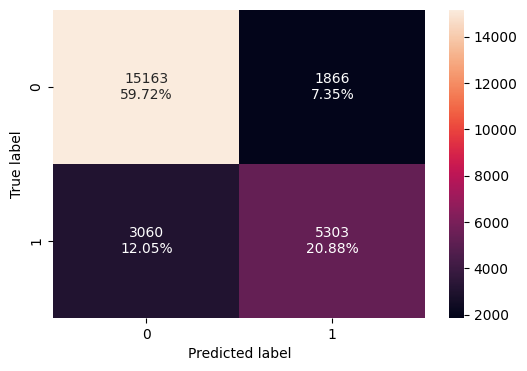

In [ ]:
confusion_matrix_statsmodels(lg, X_train, y_train)

In [ ]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.806002  0.634103   0.739713  0.682848


- The f1_score of the model is ~0.68 and we will try to maximize it further

* We will have to remove high p-values

### Removing high p-value variables

In [ ]:
# initial list of columns
cols = X_train.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 2', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [ ]:
X_train2 = X_train[selected_features]

In [ ]:
logit1 = sm.Logit(y_train, X_train2.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 11 May 2025   Pseudo R-squ.:                  0.3282
Time:                        16:06:30   Log-Likelihood:                -10810.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           -915.6391    120.471     -7.600      0.000   -1151.758    -679.520
no_of_adults                       0.1088      0.037      2.914      0.

* Coefficient of some levels of arrival year and no. of previous cancellation are positive an increase in these will lead to increase in chances of booking getting canceled

* Coefficient of repeated guest, market segment type, toom type resereved, requred parking are negative increase in these will lead to decrease in chances of booking getting cancel.

**Converting coefficients to odds**

* The coefficients ($\beta$s) of the logistic regression model are in terms of $log(odds)$ and to find the odds, we have to take the exponential of the coefficients
* Therefore, **$odds =  exp(\beta)$**
* The percentage change in odds is given as $(exp(\beta) - 1) * 100$

In [ ]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train2.columns).T

const  no_of_adults  no_of_children  no_of_weekend_nights  \
Odds           0.0       1.11491        1.165459              1.114697   
Change_odd% -100.0      11.49096       16.545927             11.469662   

             no_of_week_nights  required_car_parking_space  lead_time  \
Odds                  1.042584                    0.202961   1.015833   
Change_odd%           4.258406                  -79.703947   1.583312   

             arrival_year  arrival_month  repeated_guest  \
Odds             1.571951       0.958388        0.064782   
Change_odd%     57.195078      -4.161197      -93.521802   

             no_of_previous_cancellations  avg_price_per_room  \
Odds                             1.257118            1.019368   
Change_odd%                     25.711810            1.936838   

             no_of_special_requests  type_of_meal_plan_Meal Plan 2  \
Odds                       0.229963                       1.178464   
Change_odd%              -77.003739                      17.846408   

             type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
Odds                               1.331095                        0.701041   
Change_odd%                       33.109465                      -29.895882   

             room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
Odds                               0.753645                        0.478845   
Change_odd%                      -24.635508                      -52.115481   

             room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
Odds                               0.379771                        0.238271   
Change_odd%                      -62.022895                      -76.172939   

             market_segment_type_Corporate  market_segment_type_Offline  
Odds                              0.453263                     0.167728  
Change_odd%                     -54.673731                   -83.227238

* Holding all other features constant a 1 unit change in no. of adults will increase the odds of a booking getting cancel by ~1.11 times or a 11% increase in odds of booking getting canceled.
* Holding all other features constant a 1 unit change in the required car parking space will decrease the odds of a booking getting canceled by ~0.20 times or a decrease of ~79% decrease in odds of booking getting canceled.

### Checking performance of the new model

Training set performance

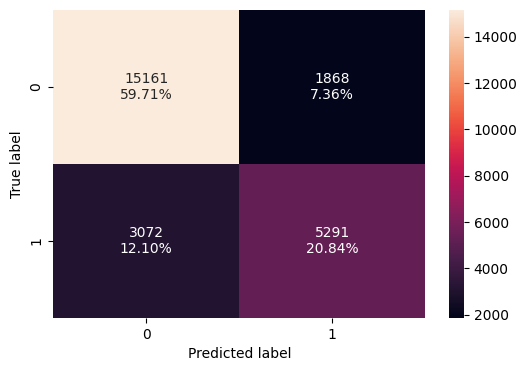

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train2, y_train)

In [ ]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train2, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.805451  0.632668    0.73907  0.681742

Test set performance

We have to first drop the columns from the test set that were dropped from the training set.

In [ ]:
X_test2 = X_test[list(X_train2.columns)]

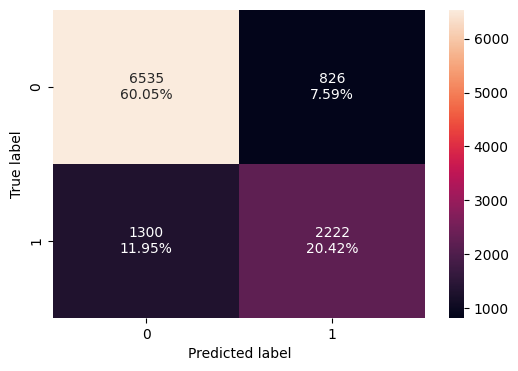

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test2, y_test)

In [ ]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test2, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.804649  0.630892   0.729003  0.676408

- The model is giving a good f1_score of ~0.681 and ~0.676 on the train and test sets respectively
- As the train and test performances are comparable, the model is not overfitting
- Moving forward we will try to improve the performance of the model

### Model Performance Improvement using ROC Curve and ROC-AUC

ROC-AUC on training set

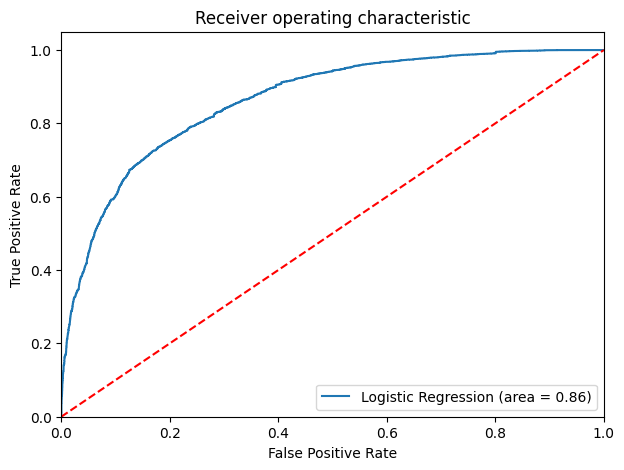

In [ ]:
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train2))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

##Optimal threshold using AUC-ROC curve

In [ ]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train2))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.37005225587078805


### Checking model performance on training set

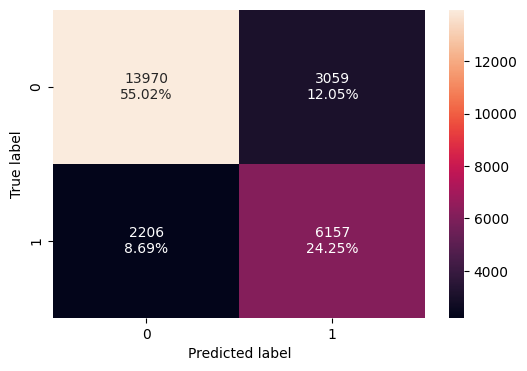

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train2, y_train, threshold=optimal_threshold_auc_roc
)

In [ ]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train2, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.792651  0.736219   0.668077  0.700495

* recall, precision and f1 score of model has increased.
* The model is still giving a good performance.

### Checking model performance on test set

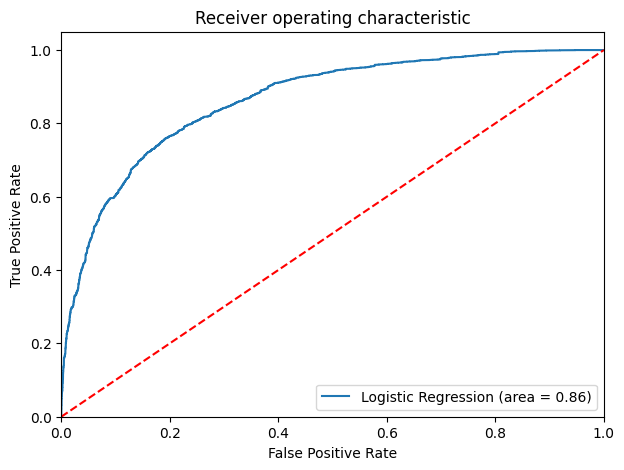

In [ ]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test2))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test2))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

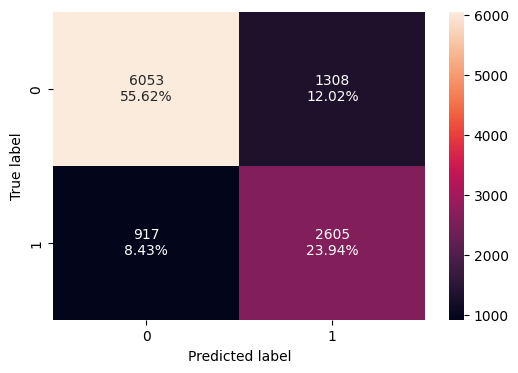

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test2, y_test, threshold=optimal_threshold_auc_roc)

In [ ]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test2, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision       F1
0  0.795553  0.739637    0.66573  0.70074

* The model will give good performence on test data, it's not overfiting.

### Precision-Recall Curve

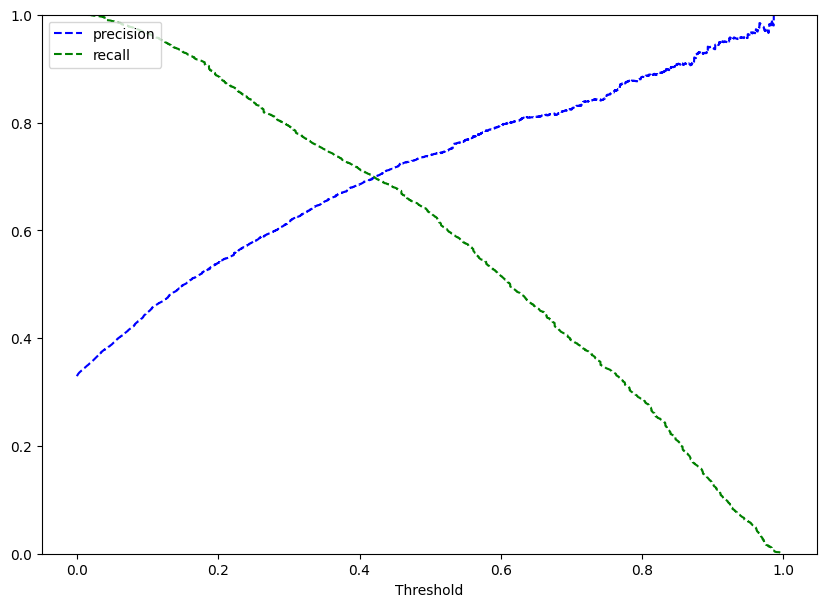

In [ ]:
y_scores = lg1.predict(X_train2)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.41, we get balanced recall and precision.

In [ ]:
# setting the threshold
optimal_threshold_curve = 0.41

## Checking model performance on training set

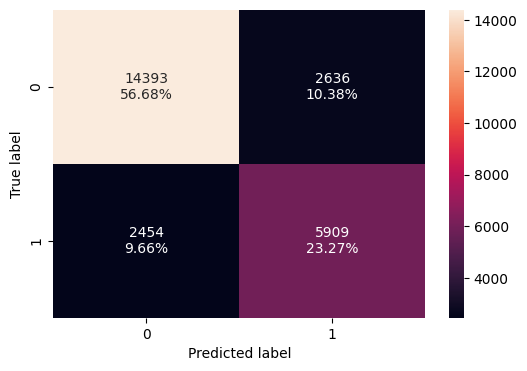

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train2, y_train, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train2, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.799543  0.706565   0.691516  0.698959

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.41 as the optimal threshold.

## Checking model performance on test set

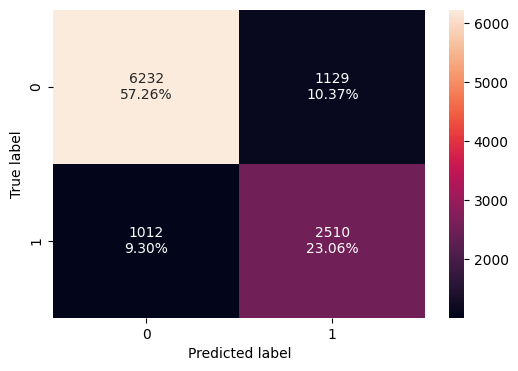

In [ ]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test2, y_test, threshold=optimal_threshold_curve)

In [ ]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test2, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.803271  0.712663    0.68975  0.701019

## Final Model Summary

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.805451   
Recall                                        0.632668   
Precision                                     0.739070   
F1                                            0.681742   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.792651   
Recall                               0.736219   
Precision                            0.668077   
F1                                   0.700495   

           Logistic Regression-0.41 Threshold  
Accuracy                             0.799543  
Recall                               0.706565  
Precision                            0.691516  
F1                                   0.698959

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.37 Threshold",
    "Logistic Regression-0.41 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.804649   
Recall                                        0.630892   
Precision                                     0.729003   
F1                                            0.676408   

           Logistic Regression-0.37 Threshold  \
Accuracy                             0.795553   
Recall                               0.739637   
Precision                            0.665730   
F1                                   0.700740   

           Logistic Regression-0.41 Threshold  
Accuracy                             0.803271  
Recall                               0.712663  
Precision                            0.689750  
F1                                   0.701019

- Almost all the three models are performing well on both training and test data without the problem of overfitting
- The model with a default threshold 0.37 is giving the best F1 score for both train and test data. Therefore it can be selected as the final model

## Building a Decision Tree model

In [ ]:
data.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0           2.0             0.0                   1.0                2.0   
1           2.0             0.0                   2.0                3.0   
2           1.0             0.0                   2.0                1.0   
3           2.0             0.0                   0.0                2.0   
4           2.0             0.0                   1.0                1.0   

   required_car_parking_space  lead_time  arrival_year  arrival_month  \
0                         0.0      224.0        2017.0           10.0   
1                         0.0        5.0        2018.0           11.0   
2                         0.0        1.0        2018.0            2.0   
3                         0.0      211.0        2018.0            5.0   
4                         0.0       48.0        2018.0            4.0   

   arrival_date  repeated_guest  no_of_previous_cancellations  \
0           2.0             0.0                           0.0   
1           6.0             0.0                           0.0   
2          28.0             0.0                           0.0   
3          20.0             0.0                           0.0   
4          11.0             0.0                           0.0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                   0.0               65.00   
1                                   0.0              106.68   
2                                   0.0               60.00   
3                                   0.0              100.00   
4                                   0.0               94.50   

   no_of_special_requests  booking_status  type_of_meal_plan_Meal Plan 2  \
0                     0.0             0.0                            0.0   
1                     1.0             0.0                            0.0   
2                     0.0             1.0                            0.0   
3                     0.0             1.0                            0.0   
4                     0.0             1.0                            0.0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                            0.0                             0.0   
1                            0.0                             1.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             1.0   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2            

In [ ]:
X = data.drop(["booking_status"], axis=1)
Y = data["booking_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 27)
Shape of test set :  (10883, 27)
Percentage of classes in training set:
booking_status
0.0    0.670644
1.0    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0.0    0.676376
1.0    0.323624
Name: proportion, dtype: float64


In [ ]:
hotel.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0           2.0             0.0                   1.0                2.0   
1           2.0             0.0                   2.0                3.0   
2           1.0             0.0                   2.0                1.0   
3           2.0             0.0                   0.0                2.0   
4           2.0             0.0                   1.0                1.0   

   required_car_parking_space  lead_time  repeated_guest  \
0                         0.0      224.0             0.0   
1                         0.0        5.0             0.0   
2                         0.0        1.0             0.0   
3                         0.0      211.0             0.0   
4                         0.0       48.0             0.0   

   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                           0.0                                   0.0   
1                           0.0                                   0.0   
2                           0.0                                   0.0   
3                           0.0                                   0.0   
4                           0.0                                   0.0   

   avg_price_per_room  no_of_special_requests  booking_status  \
0               65.00                     0.0             0.0   
1              106.68                     1.0             0.0   
2               60.00                     0.0             1.0   
3              100.00                     0.0             1.0   
4               94.50                     0.0             1.0   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                            0.0                            0.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            0.0   
4                            0.0                            0.0   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                             0.0                             0.0   
1                             1.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             1.0                             0.0   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                             0.0                                0.0   
1                             0.0                                0.0   
2                             0.0                                0.0   
3                             0.0                                0.0   
4                             0.0                                0.0   

   market_segment_type_Corporate  market_segment_type_Offline  \
0                            0.0                          1.0   
1                            0.0                          0.0   
2                            0.0                          0.0   
3             

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

**Model evaluation criterion**

**Model can make wrong predictions as:**
- Predicting the booking will not cancel but in reality, the booking was canceled(FN)
- Predicting the booking will cancel but in reality, the booking was not canceled(FP)

**Which case is more important?**

- If we predict that a booking will not cancel but in reality, the booking gets canceled, then the hotel will have to bear losses
- If we predict that a booking will cancel but in reality, the booking does not get cancel, then the hotel has to make arrangements for new room or hotel will lose the reputation.
So both is important.


**How to reduce the losses?**

The hotel would want the F1 score to be maximized, greater the F1 score score higher are the chances of minimizing the False Negatives and false possitives.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

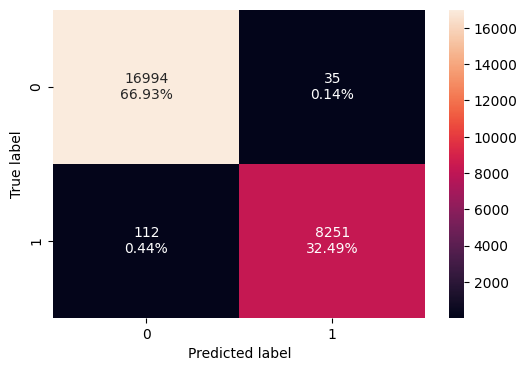

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

Accuracy    Recall  Precision        F1
0  0.994211  0.986608   0.995776  0.991171

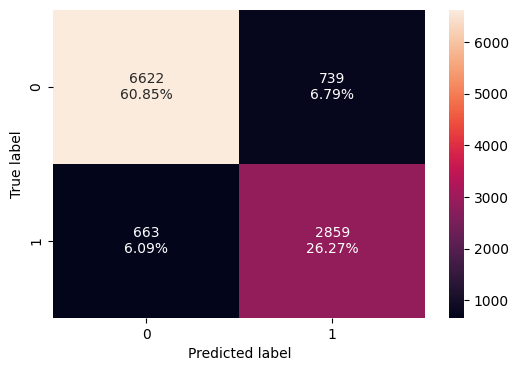

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(
    model0, X_test, y_test
)
decision_tree_perf_test_without

Accuracy    Recall  Precision       F1
0  0.871175  0.811755   0.794608  0.80309

### Decision Tree (with class_weights)
* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

In [ ]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

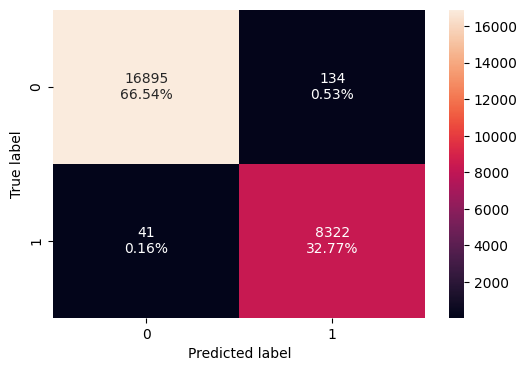

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy    Recall  Precision        F1
0  0.993108  0.995097   0.984153  0.989595

* Model is able to perfectly classify all the data points on the training set.
* some errors on the training set, most sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

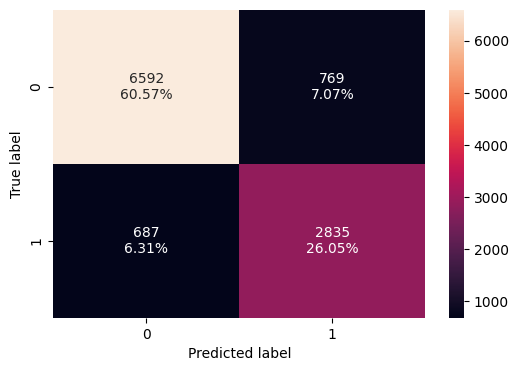

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy   Recall  Precision        F1
0  0.866213  0.80494   0.786626  0.795678

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.350897
avg_price_per_room                    0.150257
market_segment_type_Online            0.095010
no_of_special_requests                0.086504
arrival_date                          0.081699
arrival_month                         0.064997
no_of_week_nights                     0.047486
no_of_weekend_nights                  0.033276
no_of_adults                          0.026521
arrival_year                          0.015983
market_segment_type_Offline           0.010847
type_of_meal_plan_Not Selected        0.007703
required_car_parking_space            0.007621
room_type_reserved_Room_Type 4        0.005542
no_of_children                        0.005133
room_type_reserved_Room_Type 2        0.002935
type_of_meal_plan_Meal Plan 2         0.002896
room_type_reserved_Room_Type 6        0.001220
room_type_reserved_Room_Type 5        0.001112
market_segment_type_Corporate         0.000740
repeated_gues

## Do we need to prune the tree?

### Prepruning

**Using GridSearch for Hyperparameter tuning of our tree model**

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=np.int64(2),
                       max_leaf_nodes=50, min_samples_split=10, random_state=1)

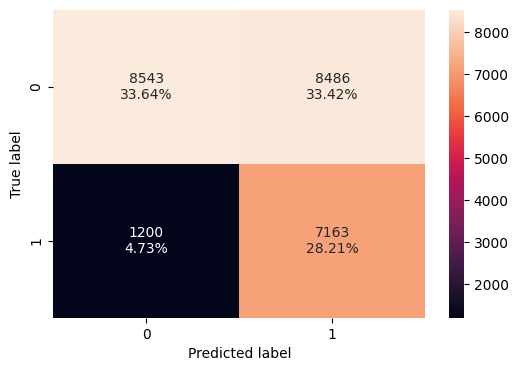

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.618541  0.856511   0.457729  0.596618

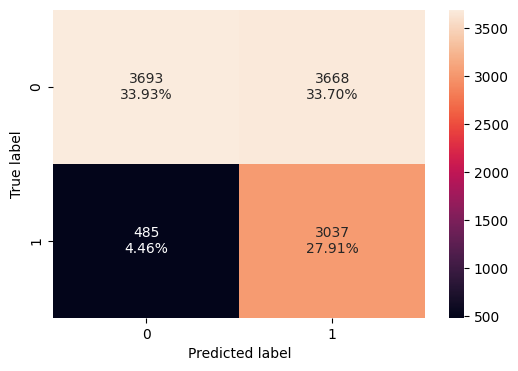

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.618396  0.862294   0.452946  0.593918

* The model is giving a generalized result now since the F1 scores on both the train and test data are coming to be around 0.59 which shows that the model is able to generalize well on unseen data.

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

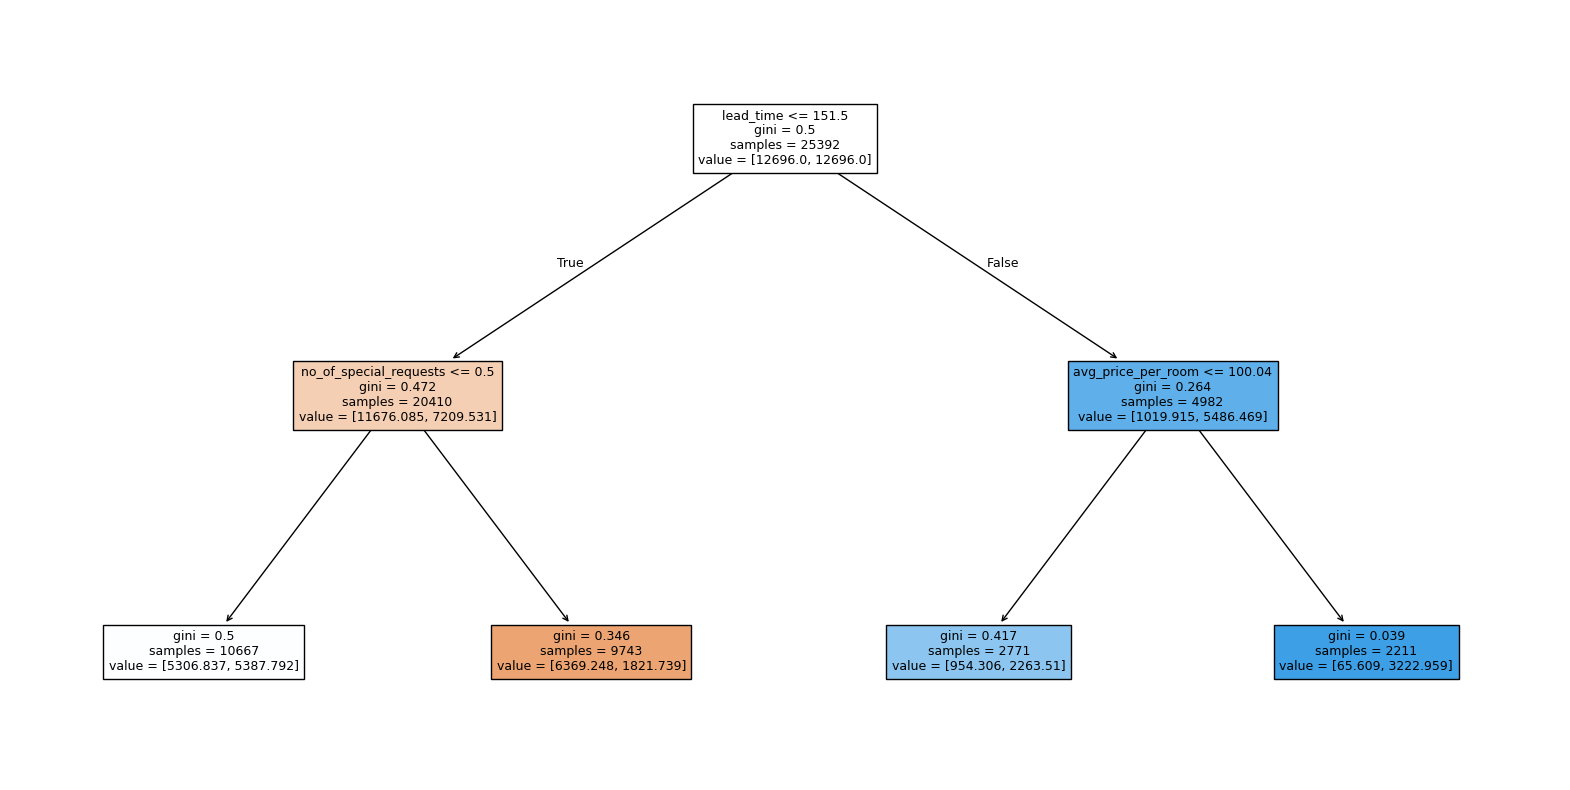

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- weights: [5306.84, 5387.79] class: 1.0
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [6369.25, 1821.74] class: 0.0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [954.31, 2263.51] class: 1.0
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [65.61, 3222.96] class: 1.0



Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If the lead time is less than or equal to 151.50 and no of special requests is less than 0.50, then booking is likely to cancel.

In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.67701797, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.08174876, 0.24123327, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

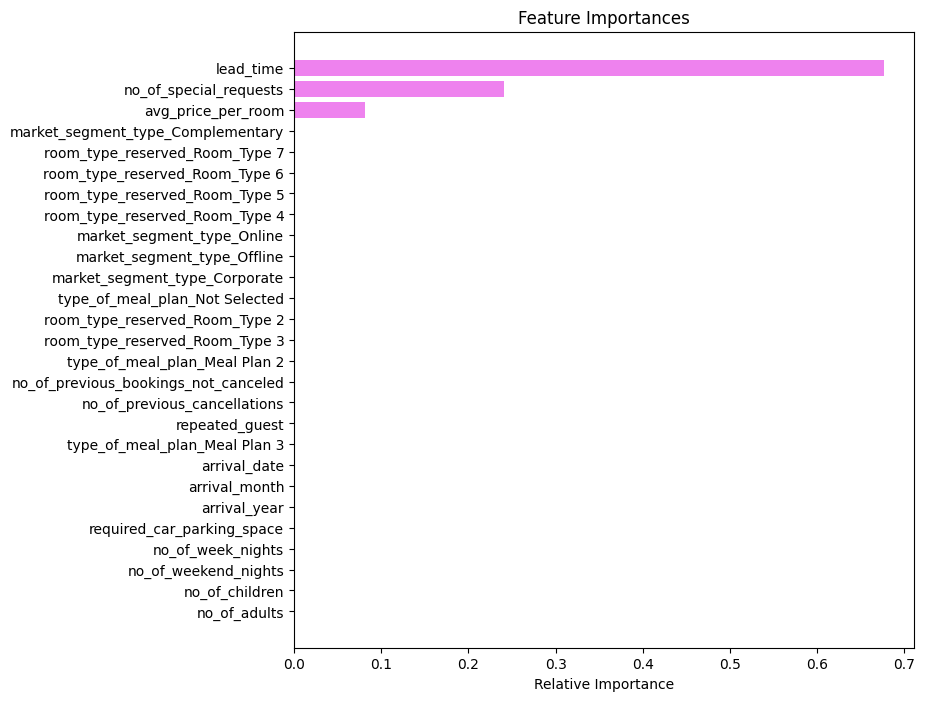

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In the pre tuned decision tree lead time, no. of special requests and average price per room are most important features.

### Post Pruning
**Total impurity of leaves vs effective alphas of pruned tree**

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.008376
1     0.000000e+00    0.008376
2     2.933821e-20    0.008376
3     2.933821e-20    0.008376
4     2.933821e-20    0.008376
...            ...         ...
1839  8.901596e-03    0.328058
1840  9.802243e-03    0.337860
1841  1.271875e-02    0.350579
1842  3.412090e-02    0.418821
1843  8.117914e-02    0.500000

[1844 rows x 2 columns]

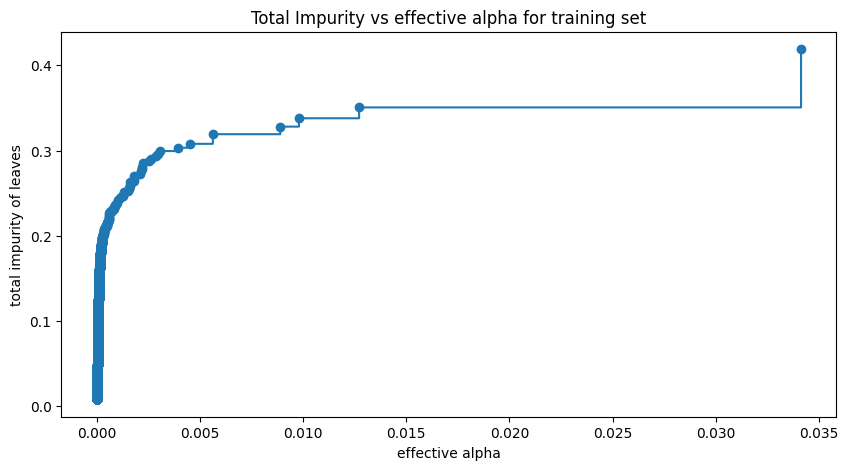

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0811791438913696


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

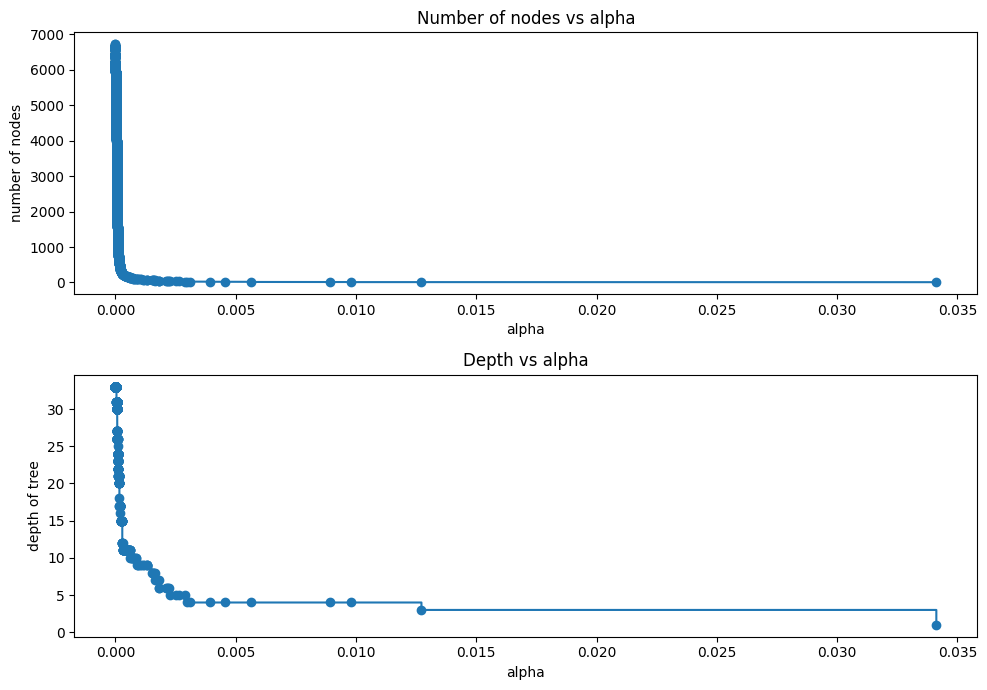

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

In [ ]:
f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

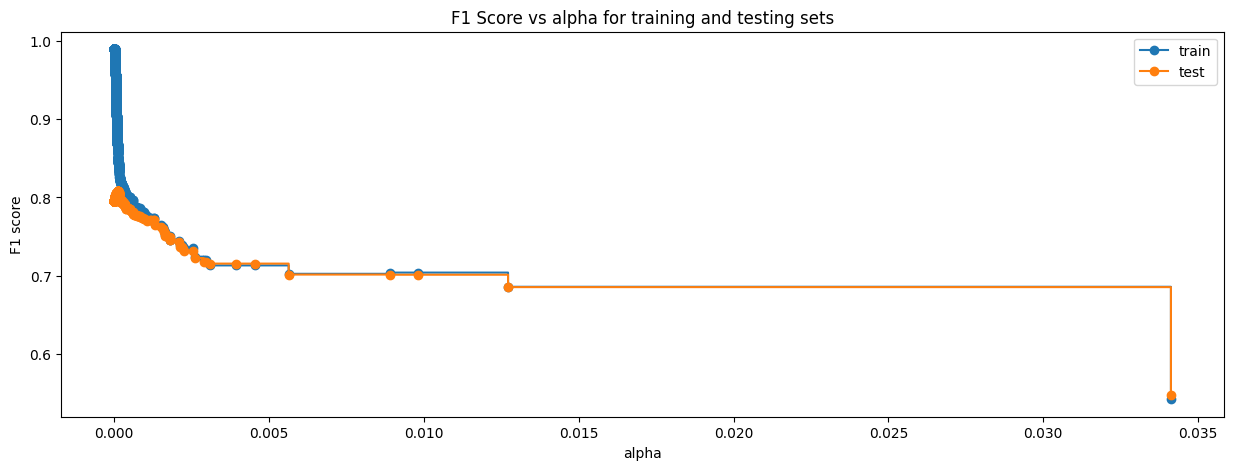

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=np.float64(0.00012267633155167043),
                       class_weight='balanced', random_state=1)


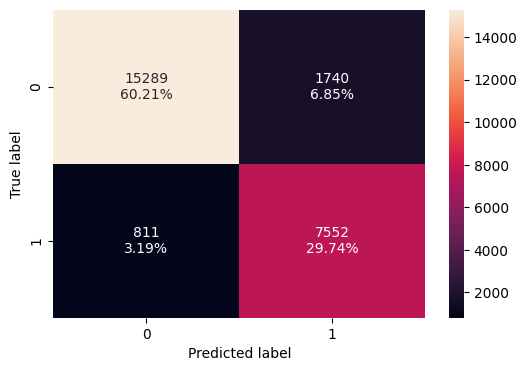

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

Accuracy    Recall  Precision        F1
0  0.899535  0.903025   0.812742  0.855508

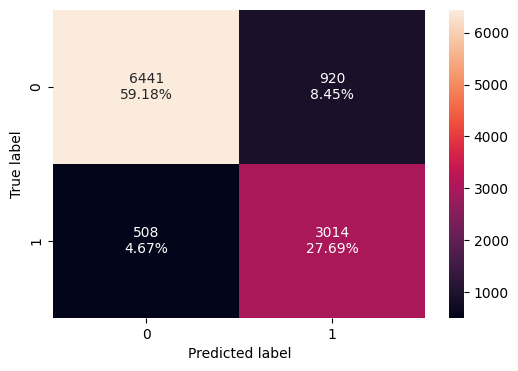

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_test

Accuracy    Recall  Precision        F1
0  0.868786  0.855764   0.766141  0.808476

* In the post-pruned tree, the model is giving a higher F1 scores on both the train and test data but the diference is 4% between.

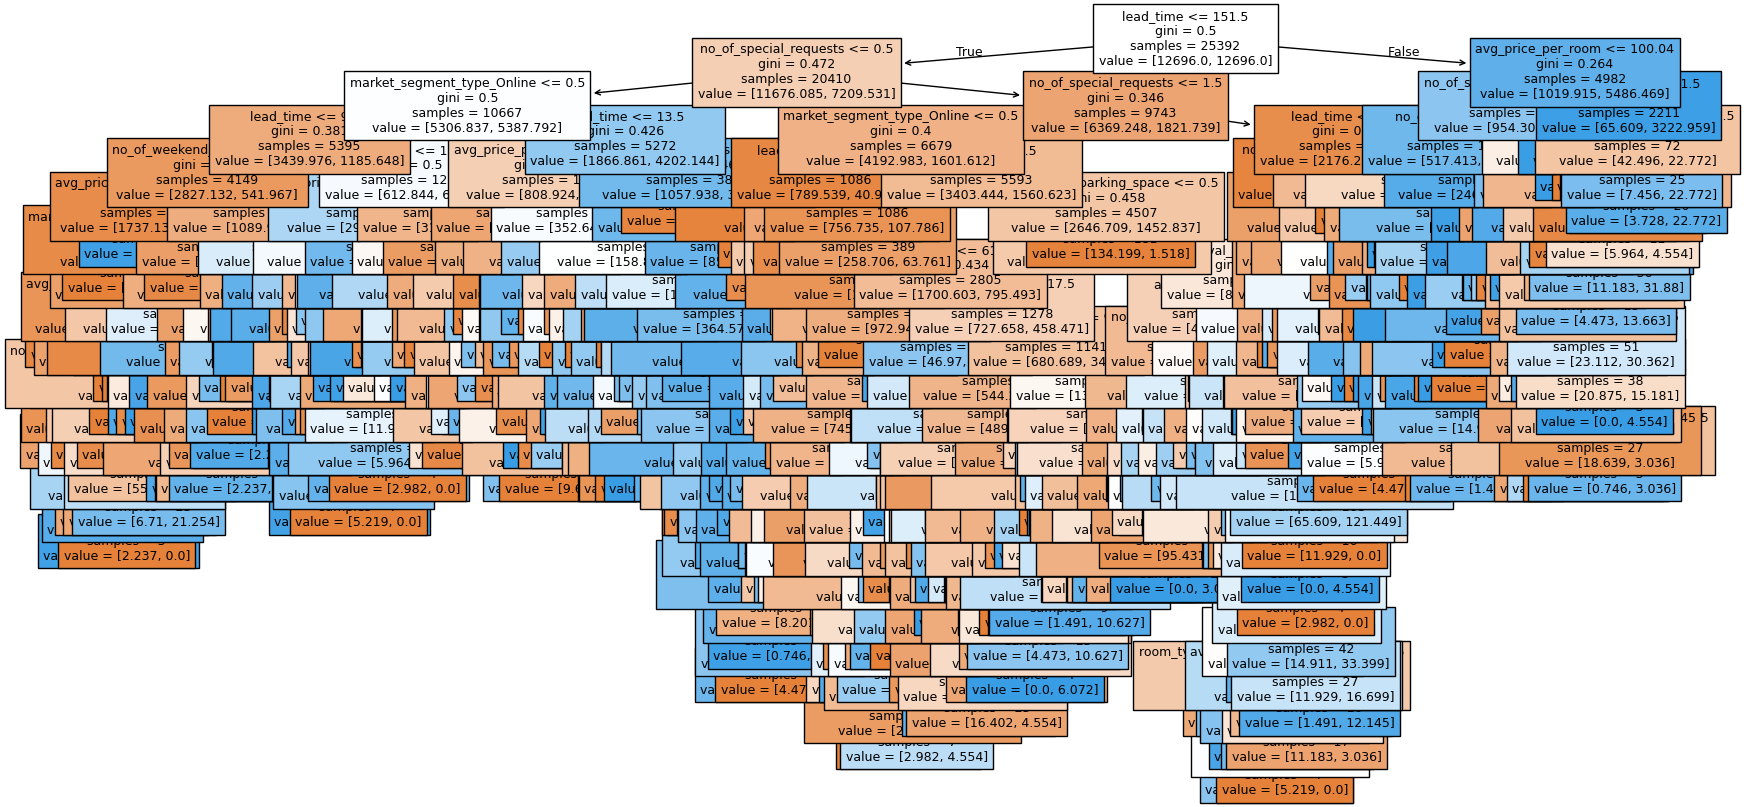

In [ ]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |--- avg_price_per_room <= 196.50
|   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |--- lead_time <= 16.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 68.50
|   |   |   |   |   |   |   |   |   |--- weights: [207.26, 10.63] class: 0.0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  68.50
|   |   |   |   |   |   |   |   |   |--- arrival_date <= 29.50
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- no_of_adults >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_date >  29.50
|   |   |  

* - We can see that the observation we got from the pre-pruned tree is not matching with the decision tree rules of the post pruned tree. The post pruned tree seems complex.

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

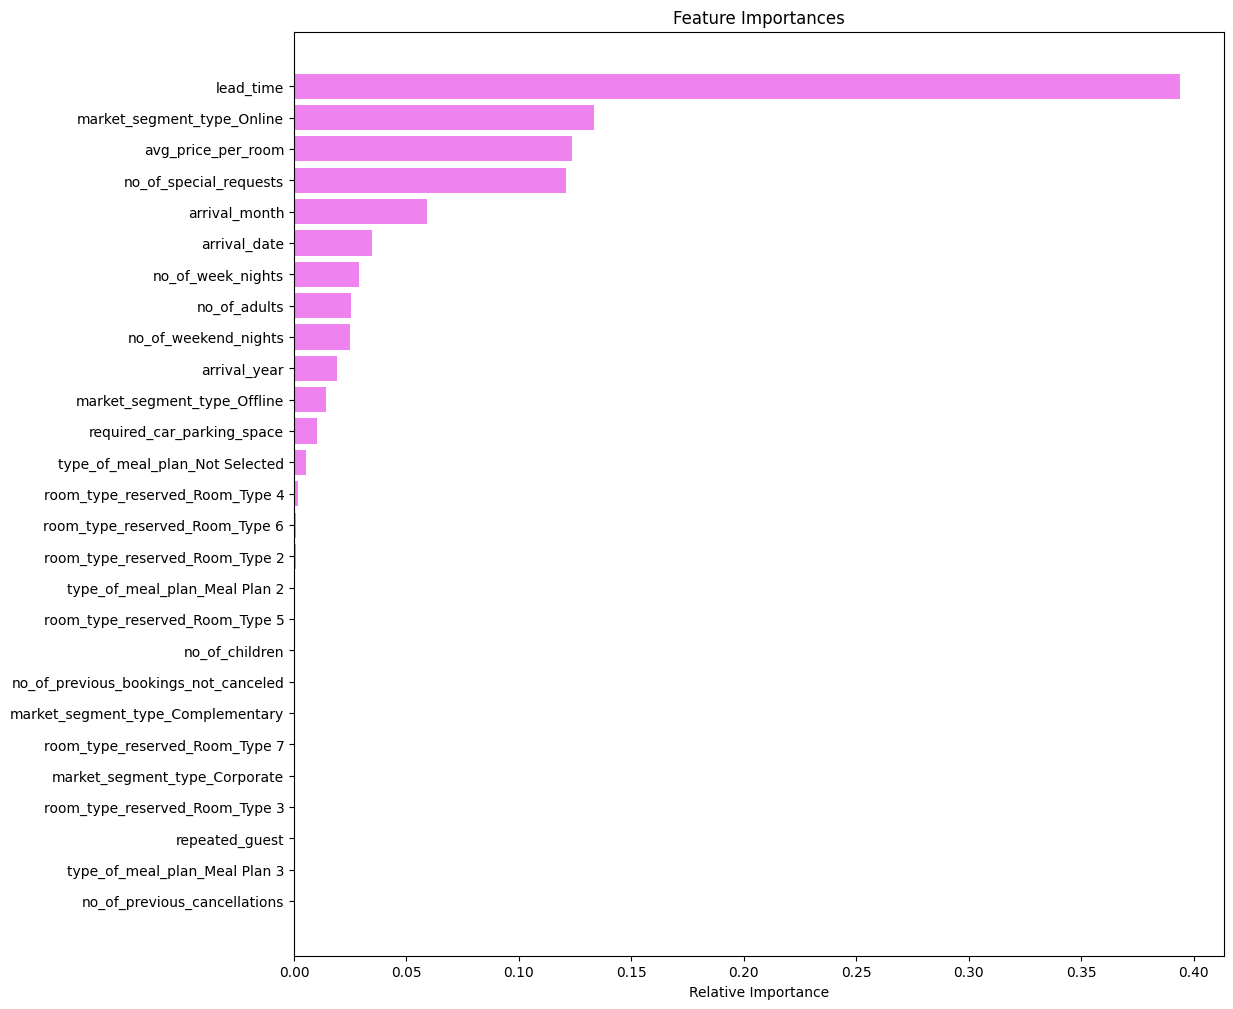

In [ ]:
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* lead time, market segment type, average price per room, no. of special request, arrival month, date, no. of week night, no. of weekend night, no. of arrivals are the most important features for the post pruned tree

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree without class_weight  \
Accuracy                             0.994211   
Recall                               0.986608   
Precision                            0.995776   
F1                                   0.991171   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                          0.993108                     0.618541   
Recall                            0.995097                     0.856511   
Precision                         0.984153                     0.457729   
F1                                0.989595                     0.596618   

           Decision Tree (Post-Pruning)  
Accuracy                       0.899535  
Recall                         0.903025  
Precision                      0.812742  
F1                             0.855508

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree without class_weight  \
Accuracy                             0.871175   
Recall                               0.811755   
Precision                            0.794608   
F1                                   0.803090   

           Decision Tree with class_weight  Decision Tree (Pre-Pruning)  \
Accuracy                          0.866213                     0.618396   
Recall                            0.804940                     0.862294   
Precision                         0.786626                     0.452946   
F1                                0.795678                     0.593918   

           Decision Tree (Post-Pruning)  
Accuracy                       0.868786  
Recall                         0.855764  
Precision                      0.766141  
F1                             0.808476

## Actionable Insights and Recommendations
**From the Logistic Model**
* We have been able to build a predictive model that can be used by INN hotel to predict the cancellation of bookings with F1 score of 0.70 on both training and testing data.
* All the logistic regression models have given a generalized performance on the training and test sets.
* Coefficient of number of adults and children, no of staying nights, no of previous cancellations are positive and an increase in these will lead to an increase in the chance of booking cancellation.
* Coefficient of required parking space, repeated guest, no of special requests are negative increase in these will lead to a decrease in chances of booking cancellation.


**From Decision Tree**
* The model built can be used to predict if the booking is going to cancel or not, and can correctly identify 86% of the booking cancellations.
* Decision pre-pruned model can give more generalized predictions on unseen data with a 0.59 F1 score.
* The decision tree post-pruned model is a little more complex than the pre-pruned model, so it might overfit the data.
* We saw that if the lead time is less than or equal to 151.50 and no of special requests is less than 0.50, then the booking is likely to be canceled.

**Recommendation**
* Inn Hotel should use the best logistic regression model to get a more generalized output with the probability of a chance of booking being canceled.
* Longer lead times between booking and arrival are often associated with higher cancellation rates, so Inn Hotel should apply non-refundable deposits to have lower cancellation rates. Also offer discounts or points for keeping their bookings
* During high-demand months like  August, September, and October, Inn Hotel should come up with a strict cancellation policy.
* For high-risk guests, follow up with confirmation emails, pre-arrival reminders, or offers to prepay, and clearly communicate cancellation terms at booking.
* Repeated customers tend not to cancel the booking, so  generate a reward system for repeat guests or those who prepay.


In [ ]:
%%shell
jupyter nbconvert --to html /content/Project_INNHotels.ipynb

[NbConvertApp] Converting notebook /content/Project_INNHotels.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 66 image(s).
[NbConvertApp] Writing 5046038 bytes to /content/Project_INNHotels.html
